# **Install**

In [1]:
!pip install lime

# **IMPORTS**

In [2]:
# ===================== BASIC SETUP =====================
import warnings
warnings.filterwarnings("ignore")

# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ===================== MODELING & PREPROCESSING =====================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ===================== MODELS =====================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ===================== EVALUATION METRICS =====================
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ===================== EXPLAINABILITY =====================
import shap
from lime.lime_tabular import LimeTabularExplainer


# **DATA LOADING AND UNDERSTANDING**

In [3]:
admissions = pd.read_csv("/content/admissions.csv")
fatalities = pd.read_csv("/content/fatalities.csv")
metrics = pd.read_csv("/content/metrics.csv")
prescriptions = pd.read_csv("/content/prescriptions.csv")
smokers = pd.read_csv("/content/smokers.csv")
pd.set_option('display.max_columns', None)

In [4]:
# col = [admissions,fatalities,metrics,prescriptions,smokers]
# for i in col:
#   print(i.info())

# admissions

In [5]:
admissions.head(3)

Year                                         ICD10 Code  \
0  2014/15                                          All codes   
1  2014/15  C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...   
2  2014/15                                            C00-D48   

                               ICD10 Diagnosis  \
0                               All admissions   
1  All diseases which can be caused by smoking   
2                                  All cancers   

                                Diagnosis Type                Metric  Sex  \
0                               All admissions  Number of admissions  NaN   
1  All diseases which can be caused by smoking  Number of admissions  NaN   
2                                  All cancers  Number of admissions  NaN   

      Value  
0  11011882  
1   1713330  
2   1691035

In [6]:
admissions.shape

(2079, 7)

In [7]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB


In [8]:
admissions.describe(include='all')

Year ICD10 Code ICD10 Diagnosis  \
count      2079       2079            2079   
unique       11         32              32   
top     2014/15  All codes  All admissions   
freq        189         66              66   

                                Diagnosis Type                Metric   Sex  \
count                                     2079                  2079  1386   
unique                                      11                     2     2   
top     Cancers which can be caused by smoking  Number of admissions  Male   
freq                                       726                  1056   693   

       Value  
count   2078  
unique  1420  
top        .  
freq      40

In [9]:
admissions['Metric'].value_counts()

Metric
Number of admissions    1056
Attributable number     1023
Name: count, dtype: int64

In [10]:
admissions['Sex'].value_counts()

Sex
Male      693
Female    693
Name: count, dtype: int64

In [11]:
admissions['Sex'].isnull().sum()

np.int64(693)

# fatalities

In [12]:
fatalities.head(3)

Year                                         ICD10 Code  \
0  2014                                          All codes   
1  2014  C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...   
2  2014                                            C00-D48   

                             ICD10 Diagnosis  \
0                                 All deaths   
1  All deaths which can be caused by smoking   
2                                All cancers   

                              Diagnosis Type                     Metric  Sex  \
0                                 All deaths  Number of observed deaths  NaN   
1  All deaths which can be caused by smoking  Number of observed deaths  NaN   
2                                All cancers  Number of observed deaths  NaN   

    Value  
0  459087  
1  235820  
2  136312

In [13]:
fatalities.shape

(1749, 7)

In [14]:
fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1749 non-null   int64 
 1   ICD10 Code       1749 non-null   object
 2   ICD10 Diagnosis  1749 non-null   object
 3   Diagnosis Type   1749 non-null   object
 4   Metric           1749 non-null   object
 5   Sex              1166 non-null   object
 6   Value            1749 non-null   object
dtypes: int64(1), object(6)
memory usage: 95.8+ KB


In [15]:
fatalities.describe(include='all')

Year ICD10 Code ICD10 Diagnosis  \
count   1749.000000       1749            1749   
unique          NaN         27              27   
top             NaN  All codes      All deaths   
freq            NaN         66              66   
mean    2009.000000        NaN             NaN   
std        3.163182        NaN             NaN   
min     2004.000000        NaN             NaN   
25%     2006.000000        NaN             NaN   
50%     2009.000000        NaN             NaN   
75%     2012.000000        NaN             NaN   
max     2014.000000        NaN             NaN   

                                Diagnosis Type                     Metric  \
count                                     1749                       1749   
unique                                      10                          2   
top     Cancers which can be caused by smoking  Number of observed deaths   
freq                                       726                        891   
mean                                       NaN                        NaN   
std                                        NaN                        NaN   
min                                        NaN                        NaN   
25%                                        NaN                        NaN   
50%                                        NaN                        NaN   
75%                                        NaN                        NaN   
max                                        NaN                        NaN   

         Sex Value  
count   1166  1749  
unique     2  1024  
top     Male   100  
freq     583    70  
mean     NaN   NaN  
std      NaN   NaN  
min      NaN   NaN  
25%      NaN   NaN  
50%      NaN   NaN  
75%      NaN   NaN  
max      NaN   NaN

# metics

In [16]:
metrics.head(3)

Year  Tobacco Price\nIndex  Retail Prices\nIndex  \
0  2015                1294.3                 386.7   
1  2014                1226.0                 383.0   
2  2013                1139.3                 374.2   

   Tobacco Price Index Relative to Retail Price Index  \
0                                              334.7    
1                                              320.1    
2                                              304.5    

   Real Households' Disposable Income  Affordability of Tobacco Index  \
0                               196.4                            58.7   
1                               190.0                            59.4   
2                               190.3                            62.5   

   Household Expenditure on Tobacco  Household Expenditure Total  \
0                           19252.0                    1152387.0   
1                           19411.0                    1118992.0   
2                           18683.0                    1073106.0   

   Expenditure on Tobacco as a Percentage of Expenditure  
0                                                1.7      
1                                                1.7      
2                                                1.7

In [17]:
metrics.shape

(36, 9)

In [18]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Year                                                   36 non-null     int64  
 1   Tobacco Price
Index                                    36 non-null     float64
 2   Retail Prices
Index                                    36 non-null     float64
 3   Tobacco Price Index Relative to Retail Price Index     36 non-null     float64
 4   Real Households' Disposable Income                     36 non-null     float64
 5   Affordability of Tobacco Index                         36 non-null     float64
 6   Household Expenditure on Tobacco                       31 non-null     float64
 7   Household Expenditure Total                            31 non-null     float64
 8   Expenditure on Tobacco as a Percentage of Expenditure

In [19]:
metrics.describe(include='all')

Year  Tobacco Price\nIndex  Retail Prices\nIndex  \
count    36.000000             36.000000             36.000000   
mean   1997.500000            520.744444            239.483333   
std      10.535654            336.517379             83.155536   
min    1980.000000            100.000000            100.000000   
25%    1988.750000            219.550000            169.200000   
50%    1997.500000            445.700000            239.650000   
75%    2006.250000            723.150000            299.575000   
max    2015.000000           1294.300000            386.700000   

       Tobacco Price Index Relative to Retail Price Index  \
count                                          36.000000    
mean                                          195.652778    
std                                            66.149810    
min                                           100.000000    
25%                                           135.000000    
50%                                           185.850000    
75%                                           241.375000    
max                                           334.700000    

       Real Households' Disposable Income  Affordability of Tobacco Index  \
count                           36.000000                       36.000000   
mean                           154.591667                       81.913889   
std                             35.899251                       10.276357   
min                             98.700000                       58.700000   
25%                            123.300000                       78.725000   
50%                            157.200000                       81.400000   
75%                            190.075000                       87.225000   
max                            196.400000                      103.500000   

       Household Expenditure on Tobacco  Household Expenditure Total  \
count                         31.000000                 3.100000e+01   
mean                       13417.451613                 6.520081e+05   
std                         3796.825216                 2.859747e+05   
min                         7006.000000                 2.144490e+05   
25%                        10519.500000                 4.085960e+05   
50%                        14047.000000                 6.394050e+05   
75%                        15822.500000                 9.050715e+05   
max                        19411.000000                 1.152387e+06   

       Expenditure on Tobacco as a Percentage of Expenditure  
count                                          31.000000      
mean                                            2.241935      
std                                             0.447045      
min                                             1.700000      
25%                                             1.800000      
50%                                             2.200000      
75%                                             2.500000      
max                                             3.300000

# prescriptions

In [20]:
prescriptions.head(3)

Year  All Pharmacotherapy Prescriptions  \
0  2014/15                               1348   
1  2013/14                               1778   
2  2012/13                               2203   

   Nicotine Replacement Therapy (NRT) Prescriptions  \
0                                               766   
1                                              1059   
2                                              1318   

   Bupropion (Zyban) Prescriptions  Varenicline (Champix) Prescriptions  \
0                               21                                561.0   
1                               22                                697.0   
2                               26                                859.0   

   Net Ingredient Cost of All Pharmacotherapies  \
0                                         38145   
1                                         48767   
2                                         58121   

   Net Ingredient Cost of Nicotine Replacement Therapies (NRT)  \
0                                              18208             
1                                              24257             
2                                              28069             

   Net Ingredient Cost of Bupropion (Zyban)  \
0                                       807   
1                                       865   
2                                       994   

   Net Ingredient Cost of Varenicline (Champix)  
0                                       19129.0  
1                                       23646.0  
2                                       29058.0

In [21]:
prescriptions.shape

(11, 9)

In [22]:
prescriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         11 non-null     object 
 1   All Pharmacotherapy Prescriptions                            11 non-null     int64  
 2   Nicotine Replacement Therapy (NRT) Prescriptions             11 non-null     int64  
 3   Bupropion (Zyban) Prescriptions                              11 non-null     int64  
 4   Varenicline (Champix) Prescriptions                          9 non-null      float64
 5   Net Ingredient Cost of All Pharmacotherapies                 11 non-null     int64  
 6   Net Ingredient Cost of Nicotine Replacement Therapies (NRT)  11 non-null     int64  
 7   Net Ingredient Cost of Bupropion (Zyban)                     11 non-null     int64 

In [23]:
prescriptions.describe(include='all')

Year  All Pharmacotherapy Prescriptions  \
count        11                          11.000000   
unique       11                                NaN   
top     2014/15                                NaN   
freq          1                                NaN   
mean        NaN                        2179.454545   
std         NaN                         366.163724   
min         NaN                        1348.000000   
25%         NaN                        2061.500000   
50%         NaN                        2205.000000   
75%         NaN                        2479.000000   
max         NaN                        2564.000000   

        Nicotine Replacement Therapy (NRT) Prescriptions  \
count                                          11.000000   
unique                                               NaN   
top                                                  NaN   
freq                                                 NaN   
mean                                         1541.636364   
std                                           388.608099   
min                                           766.000000   
25%                                          1405.000000   
50%                                          1545.000000   
75%                                          1832.000000   
max                                          2076.000000   

        Bupropion (Zyban) Prescriptions  Varenicline (Champix) Prescriptions  \
count                         11.000000                             9.000000   
unique                              NaN                                  NaN   
top                                 NaN                                  NaN   
freq                                NaN                                  NaN   
mean                          66.454545                           698.444444   
std                           46.409834                           294.100370   
min                           21.000000                            22.000000   
25%                           28.000000                           612.000000   
50%                           47.000000                           714.000000   
75%                          113.000000                           877.000000   
max                          136.000000                           987.000000   

        Net Ingredient Cost of All Pharmacotherapies  \
count                                      11.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                    54263.090909   
std                                      9415.126292   
min                                     38145.000000   
25%                                     47092.500000   
50%                                     57520.000000   
75%                                     62452.000000   
max                                     65883.000000   

        Net Ingredient Cost of Nicotine Replacement Therapies (NRT)  \
count                                           11.000000             
unique                                                NaN             
top                                                   NaN             
freq                                                  NaN             
mean                                         32221.636364             
std                                           7457.243771             
min                                          18208.000000             
25%                                          29376.000000             
50%                                          30951.000000             
75%                                          37813.000000             
max                                          43465.000000             

        Net Ingredient Cost of Bupropion (Zyban)  \
count                                  11.000000   
unique                                       NaN  

# smokers

In [24]:
smokers.head(3)

Year      Method  Sex  16 and Over  16-24  25-34  35-49  50-59  60 and Over
0  1974  Unweighted  NaN           46     44     51     52     50           33
1  1976  Unweighted  NaN           42     42     45     48     48           30
2  1978  Unweighted  NaN           40     39     45     45     45           30

In [25]:
smokers.shape

(84, 9)

In [26]:
smokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         84 non-null     int64 
 1   Method       84 non-null     object
 2   Sex          56 non-null     object
 3   16 and Over  84 non-null     int64 
 4   16-24        84 non-null     int64 
 5   25-34        84 non-null     int64 
 6   35-49        84 non-null     int64 
 7   50-59        84 non-null     int64 
 8   60 and Over  84 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.0+ KB


In [27]:
smokers.describe(include='all')

Year    Method   Sex  16 and Over      16-24      25-34  \
count     84.000000        84    56    84.000000  84.000000  84.000000   
unique          NaN         2     2          NaN        NaN        NaN   
top             NaN  Weighted  Male          NaN        NaN        NaN   
freq            NaN        45    28          NaN        NaN        NaN   
mean    1997.250000       NaN   NaN    27.892857  31.345238  33.678571   
std       12.142601       NaN   NaN     7.525087   5.954636   7.287819   
min     1974.000000       NaN   NaN    17.000000  20.000000  20.000000   
25%     1987.500000       NaN   NaN    22.000000  26.000000  28.000000   
50%     2000.500000       NaN   NaN    27.000000  33.000000  34.000000   
75%     2007.250000       NaN   NaN    32.000000  35.000000  37.000000   
max     2014.000000       NaN   NaN    51.000000  47.000000  55.000000   

            35-49      50-59  60 and Over  
count   84.000000  84.000000    84.000000  
unique        NaN        NaN          NaN  
top           NaN        NaN          NaN  
freq          NaN        NaN          NaN  
mean    31.285714  28.952381    18.750000  
std      8.161873   9.376855     7.441134  
min     20.000000  18.000000    10.000000  
25%     25.000000  22.000000    13.000000  
50%     29.500000  26.000000    16.000000  
75%     36.000000  34.250000    23.000000  
max     55.000000  53.000000    44.000000

# **DATA CLEANING**

In [28]:
# --- Clean Year ---
# Extract start year as integer
admissions['year'] = admissions['Year'].str[:4].astype(int)  # extract year as int
admissions = admissions.drop(columns=['Year'])               # drop old column

# --- Clean Value ---
# Remove commas and convert to numeric
admissions['Value'] = pd.to_numeric(admissions['Value'].astype(str).str.replace(',', ''), errors='coerce')
# Fill NaN (e.g., from '.') with 0
admissions['Value'] = admissions['Value'].fillna(0)

# --- Clean Sex ---
# Fill missing values
admissions['Sex'] = admissions['Sex'].fillna('Unknown')
# Convert to categorical type
admissions['Sex'] = admissions['Sex'].astype('category')

# --- Strip whitespace in text columns ---
text_cols = ['ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric']
for col in text_cols:
    admissions[col] = admissions[col].str.strip()

# --- Drop exact duplicates ---
admissions = admissions.drop_duplicates()

# --- Optional: Create Smoking-related flag ---
admissions['Smoking_Related'] = admissions['Diagnosis Type'].str.contains('smoking', case=False)
admissions['Smoking_Related'] = admissions['Smoking_Related'].astype(int)  # 1 = Yes, 0 = No

# --- Optional: Check for extreme values ---
print("Admissions Value Stats:\n", admissions['Value'].describe())

Admissions Value Stats:
 count    2.079000e+03
mean     1.882745e+05
std      8.442827e+05
min      0.000000e+00
25%      4.400000e+03
50%      1.260000e+04
75%      5.599400e+04
max      1.101188e+07
Name: Value, dtype: float64


In [29]:
admissions.head(3)

ICD10 Code  \
0                                          All codes   
1  C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...   
2                                            C00-D48   

                               ICD10 Diagnosis  \
0                               All admissions   
1  All diseases which can be caused by smoking   
2                                  All cancers   

                                Diagnosis Type                Metric      Sex  \
0                               All admissions  Number of admissions  Unknown   
1  All diseases which can be caused by smoking  Number of admissions  Unknown   
2                                  All cancers  Number of admissions  Unknown   

        Value  year  Smoking_Related  
0  11011882.0  2014                0  
1   1713330.0  2014                1  
2   1691035.0  2014                0

In [30]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ICD10 Code       2079 non-null   object  
 1   ICD10 Diagnosis  2079 non-null   object  
 2   Diagnosis Type   2079 non-null   object  
 3   Metric           2079 non-null   object  
 4   Sex              2079 non-null   category
 5   Value            2079 non-null   float64 
 6   year             2079 non-null   int64   
 7   Smoking_Related  2079 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 116.0+ KB


In [31]:
fatalities['year'] = fatalities['Year'].astype(str).str[:4].astype(int)  # take first 4 digits as int
fatalities = fatalities.drop(columns=['Year'])  # drop the old Year column

# --- Clean Value ---
fatalities['Value'] = pd.to_numeric(fatalities['Value'].astype(str).str.replace(',', ''), errors='coerce')
fatalities['Value'] = fatalities['Value'].fillna(0)

# --- Clean Sex ---
fatalities['Sex'] = fatalities['Sex'].fillna('Unknown')
fatalities['Sex'] = fatalities['Sex'].astype('category')

# --- Strip whitespace in text columns ---
text_cols = ['ICD10 Code','ICD10 Diagnosis','Diagnosis Type','Metric','Sex']
for col in text_cols:
    fatalities[col] = fatalities[col].str.strip()

# --- Drop exact duplicates ---
fatalities = fatalities.drop_duplicates()

# --- Optional: Create Smoking-related flag ---
fatalities['Smoking_Related'] = fatalities['Diagnosis Type'].str.contains('smoking', case=False).astype(int)

# --- Optional: Check statistics ---
print("Fatalities Value Stats:\n", fatalities['Value'].describe())


Fatalities Value Stats:
 count      1749.000000
mean      20000.299600
std       53133.595192
min           0.000000
25%         800.000000
50%        2687.000000
75%       13200.000000
max      469186.000000
Name: Value, dtype: float64


In [32]:
fatalities.head(3)

ICD10 Code  \
0                                          All codes   
1  C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...   
2                                            C00-D48   

                             ICD10 Diagnosis  \
0                                 All deaths   
1  All deaths which can be caused by smoking   
2                                All cancers   

                              Diagnosis Type                     Metric  \
0                                 All deaths  Number of observed deaths   
1  All deaths which can be caused by smoking  Number of observed deaths   
2                                All cancers  Number of observed deaths   

       Sex     Value  year  Smoking_Related  
0  Unknown  459087.0  2014                0  
1  Unknown  235820.0  2014                1  
2  Unknown  136312.0  2014                0

In [33]:
fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ICD10 Code       1749 non-null   object 
 1   ICD10 Diagnosis  1749 non-null   object 
 2   Diagnosis Type   1749 non-null   object 
 3   Metric           1749 non-null   object 
 4   Sex              1749 non-null   object 
 5   Value            1749 non-null   float64
 6   year             1749 non-null   int64  
 7   Smoking_Related  1749 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 109.4+ KB


In [34]:
# --- Clean column names ---
metrics.columns = metrics.columns.str.replace('\n',' ', regex=True).str.strip().str.lower().str.replace(' ', '_')

# --- Drop duplicates ---
metrics = metrics.drop_duplicates()

# --- Sort by year ---
metrics = metrics.sort_values('year')

# --- Handle missing values ---
metrics.interpolate(method='linear', inplace=True)
metrics.fillna(metrics.median(), inplace=True)

# --- Ensure year is integer ---
metrics['year'] = metrics['year'].astype(int)

In [35]:
metrics.head(3)

year  tobacco_price_index  retail_prices_index  \
35  1980                100.0                100.0   
34  1981                123.5                111.9   
33  1982                142.5                121.5   

    tobacco_price_index_relative_to_retail_price_index  \
35                                              100.0    
34                                              110.4    
33                                              117.3    

    real_households'_disposable_income  affordability_of_tobacco_index  \
35                               100.0                           100.0   
34                                99.1                            89.7   
33                                98.7                            84.2   

    household_expenditure_on_tobacco  household_expenditure_total  \
35                           14047.0                     639405.0   
34                           14047.0                     639405.0   
33                           14047.0                     639405.0   

    expenditure_on_tobacco_as_a_percentage_of_expenditure  
35                                                2.2      
34                                                2.2      
33                                                2.2

In [36]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 35 to 0
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   year                                                   36 non-null     int64  
 1   tobacco_price_index                                    36 non-null     float64
 2   retail_prices_index                                    36 non-null     float64
 3   tobacco_price_index_relative_to_retail_price_index     36 non-null     float64
 4   real_households'_disposable_income                     36 non-null     float64
 5   affordability_of_tobacco_index                         36 non-null     float64
 6   household_expenditure_on_tobacco                       36 non-null     float64
 7   household_expenditure_total                            36 non-null     float64
 8   expenditure_on_tobacco_as_a_percentage_of_expenditure  36 

In [37]:
# --- Step 1: Convert Year to int ---
prescriptions['Year'] = prescriptions['Year'].str[:4].astype(int)

# --- Step 2: Fill missing Varenicline data ---
prescriptions['Varenicline (Champix) Prescriptions'] = prescriptions['Varenicline (Champix) Prescriptions'].fillna(0).astype(int)
prescriptions['Net Ingredient Cost of Varenicline (Champix)'] = prescriptions['Net Ingredient Cost of Varenicline (Champix)'].fillna(0).astype(int)

# --- Step 3: Clean column names ---
prescriptions.columns = prescriptions.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# --- Step 4: Drop duplicates ---
prescriptions = prescriptions.drop_duplicates()

In [38]:
prescriptions.head(3)

year  all_pharmacotherapy_prescriptions  \
0  2014                               1348   
1  2013                               1778   
2  2012                               2203   

   nicotine_replacement_therapy_nrt_prescriptions  \
0                                             766   
1                                            1059   
2                                            1318   

   bupropion_zyban_prescriptions  varenicline_champix_prescriptions  \
0                             21                                561   
1                             22                                697   
2                             26                                859   

   net_ingredient_cost_of_all_pharmacotherapies  \
0                                         38145   
1                                         48767   
2                                         58121   

   net_ingredient_cost_of_nicotine_replacement_therapies_nrt  \
0                                              18208           
1                                              24257           
2                                              28069           

   net_ingredient_cost_of_bupropion_zyban  \
0                                     807   
1                                     865   
2                                     994   

   net_ingredient_cost_of_varenicline_champix  
0                                       19129  
1                                       23646  
2                                       29058

In [39]:
prescriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   year                                                       11 non-null     int64
 1   all_pharmacotherapy_prescriptions                          11 non-null     int64
 2   nicotine_replacement_therapy_nrt_prescriptions             11 non-null     int64
 3   bupropion_zyban_prescriptions                              11 non-null     int64
 4   varenicline_champix_prescriptions                          11 non-null     int64
 5   net_ingredient_cost_of_all_pharmacotherapies               11 non-null     int64
 6   net_ingredient_cost_of_nicotine_replacement_therapies_nrt  11 non-null     int64
 7   net_ingredient_cost_of_bupropion_zyban                     11 non-null     int64
 8   net_ingredient_cost_of_vareniclin

In [40]:
# --- Step 1: Year ---
smokers['year'] = smokers['Year'].astype(int)

# --- Step 2: Sex ---
smokers['sex'] = smokers['Sex'].fillna('Unknown').astype('category')
smokers = smokers.drop(columns=['Year', 'Sex'])

# --- Step 3: Numeric columns ---
numeric_cols = ['16 and Over', '16-24', '25-34', '35-49', '50-59', '60 and Over']
smokers[numeric_cols] = smokers[numeric_cols].apply(pd.to_numeric, errors='coerce')
smokers[numeric_cols] = smokers[numeric_cols].fillna(0)

# --- Step 4: Drop duplicates ---
smokers = smokers.drop_duplicates()

# --- Step 5: Clean column names ---
smokers.columns = smokers.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')


In [41]:
smokers.head(3)

method  16_and_over  16_24  25_34  35_49  50_59  60_and_over  year  \
0  Unweighted           46     44     51     52     50           33  1974   
1  Unweighted           42     42     45     48     48           30  1976   
2  Unweighted           40     39     45     45     45           30  1978   

       sex  
0  Unknown  
1  Unknown  
2  Unknown

In [42]:
smokers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   method       84 non-null     object  
 1   16_and_over  84 non-null     int64   
 2   16_24        84 non-null     int64   
 3   25_34        84 non-null     int64   
 4   35_49        84 non-null     int64   
 5   50_59        84 non-null     int64   
 6   60_and_over  84 non-null     int64   
 7   year         84 non-null     int64   
 8   sex          84 non-null     category
dtypes: category(1), int64(7), object(1)
memory usage: 5.6+ KB


In [43]:
admissions['Sex'] = admissions['Sex'].fillna('Unknown')
fatalities['Sex'] = fatalities['Sex'].fillna('Unknown')

In [44]:
col = [admissions,fatalities,metrics,prescriptions,smokers]
names = ['admissions', 'fatalities', 'metrics', 'prescriptions', 'smokers']
for i, df in enumerate(col):
  print(f"{names[i]}")
  print(df.shape)
  print(df.isnull().sum())

admissions
(2079, 8)
ICD10 Code         0
ICD10 Diagnosis    0
Diagnosis Type     0
Metric             0
Sex                0
Value              0
year               0
Smoking_Related    0
dtype: int64
fatalities
(1749, 8)
ICD10 Code         0
ICD10 Diagnosis    0
Diagnosis Type     0
Metric             0
Sex                0
Value              0
year               0
Smoking_Related    0
dtype: int64
metrics
(36, 9)
year                                                     0
tobacco_price_index                                      0
retail_prices_index                                      0
tobacco_price_index_relative_to_retail_price_index       0
real_households'_disposable_income                       0
affordability_of_tobacco_index                           0
household_expenditure_on_tobacco                         0
household_expenditure_total                              0
expenditure_on_tobacco_as_a_percentage_of_expenditure    0
dtype: int64
prescriptions
(11, 9)
year          

In [45]:
admissions = admissions.dropna(subset=['Value'])

In [46]:
col = [admissions,fatalities,metrics,prescriptions,smokers]
names = ['admissions', 'fatalities', 'metrics', 'prescriptions', 'smokers']
for i, df in enumerate(col):
  print(f"{names[i]}")
  print(df.shape)
  print(df.columns)

admissions
(2079, 8)
Index(['ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric', 'Sex',
       'Value', 'year', 'Smoking_Related'],
      dtype='object')
fatalities
(1749, 8)
Index(['ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric', 'Sex',
       'Value', 'year', 'Smoking_Related'],
      dtype='object')
metrics
(36, 9)
Index(['year', 'tobacco_price_index', 'retail_prices_index',
       'tobacco_price_index_relative_to_retail_price_index',
       'real_households'_disposable_income', 'affordability_of_tobacco_index',
       'household_expenditure_on_tobacco', 'household_expenditure_total',
       'expenditure_on_tobacco_as_a_percentage_of_expenditure'],
      dtype='object')
prescriptions
(11, 9)
Index(['year', 'all_pharmacotherapy_prescriptions',
       'nicotine_replacement_therapy_nrt_prescriptions',
       'bupropion_zyban_prescriptions', 'varenicline_champix_prescriptions',
       'net_ingredient_cost_of_all_pharmacotherapies',
       'net_ingredient_cost_of_nico

In [47]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_', regex=False)
        .str.replace('-', '_', regex=False)
        .str.replace("'", "", regex=False)
        .str.replace(r'[^0-9a-zA-Z_]', '', regex=True)
    )
    return df

# Apply to all datasets
admissions = clean_columns(admissions)
fatalities = clean_columns(fatalities)
metrics = clean_columns(metrics)
prescriptions = clean_columns(prescriptions)
smokers = clean_columns(smokers)


In [48]:
# --- Step 1: Merge admissions and fatalities ---
combined_df = pd.merge(
    admissions,
    fatalities,
    on=['year', 'icd10_code', 'sex'],
    suffixes=('_admissions', '_fatalities'),
    how='outer'
)

# --- Step 2: Merge metrics (year-level data) ---
combined_df = pd.merge(
    combined_df,
    metrics,
    on='year',
    how='left'
)

# --- Step 3: Merge prescriptions (year-level data) ---
combined_df = pd.merge(
    combined_df,
    prescriptions,
    on='year',
    how='left'
)

# --- Step 4: Merge smokers (year + sex) ---
combined_df = pd.merge(
    combined_df,
    smokers,
    on=['year', 'sex'],
    how='left'
)

# --- Step 5: Check final shape and columns ---
print(combined_df.shape)
print(combined_df.columns)


(3795, 36)
Index(['icd10_code', 'icd10_diagnosis_admissions', 'diagnosis_type_admissions',
       'metric_admissions', 'sex', 'value_admissions', 'year',
       'smoking_related_admissions', 'icd10_diagnosis_fatalities',
       'diagnosis_type_fatalities', 'metric_fatalities', 'value_fatalities',
       'smoking_related_fatalities', 'tobacco_price_index',
       'retail_prices_index',
       'tobacco_price_index_relative_to_retail_price_index',
       'real_households_disposable_income', 'affordability_of_tobacco_index',
       'household_expenditure_on_tobacco', 'household_expenditure_total',
       'expenditure_on_tobacco_as_a_percentage_of_expenditure',
       'all_pharmacotherapy_prescriptions',
       'nicotine_replacement_therapy_nrt_prescriptions',
       'bupropion_zyban_prescriptions', 'varenicline_champix_prescriptions',
       'net_ingredient_cost_of_all_pharmacotherapies',
       'net_ingredient_cost_of_nicotine_replacement_therapies_nrt',
       'net_ingredient_cost_of_bup

In [49]:
combined_df.isnull().sum()

icd10_code                                                     0
icd10_diagnosis_admissions                                     0
diagnosis_type_admissions                                      0
metric_admissions                                              0
sex                                                            0
value_admissions                                               0
year                                                           0
smoking_related_admissions                                     0
icd10_diagnosis_fatalities                                   330
diagnosis_type_fatalities                                    330
metric_fatalities                                            330
value_fatalities                                             330
smoking_related_fatalities                                   330
tobacco_price_index                                            0
retail_prices_index                                            0
tobacco_price_index_relative_to_retail_price_index             0
real_households_disposable_income                              0
affordability_of_tobacco_index                                 0
household_expenditure_on_tobacco                               0
household_expenditure_total                                    0
expenditure_on_tobacco_as_a_percentage_of_expenditure          0
all_pharmacotherapy_prescriptions                              0
nicotine_replacement_therapy_nrt_prescriptions                 0
bupropion_zyban_prescriptions                                  0
varenicline_champix_prescriptions                              0
net_ingredient_cost_of_all_pharmacotherapies                   0
net_ingredient_cost_of_nicotine_replacement_therapies_nrt      0
net_ingredient_cost_of_bupropion_zyban                         0
net_ingredient_cost_of_varenicline_champix                     0
method                                                         0
16_and_over                                                    0
16_24                                                          0
25_34                                                          0
35_49                                                          0
50_59                                                          0
60_and_over                                                    0
dtype: int64

In [50]:
# Flag rows with fatalities
combined_df['has_fatalities'] = (combined_df['value_fatalities'].notna() & (combined_df['value_fatalities'] > 0)).astype(int)

# Fill missing fatalities values with 0
combined_df['value_fatalities'] = combined_df['value_fatalities'].fillna(0)

# Optional: fill text columns in fatalities with 'Unknown'
for col in ['icd10_diagnosis_fatalities','diagnosis_type_fatalities','metric_fatalities']:
    combined_df[col] = combined_df[col].fillna('Unknown')


In [51]:
combined_df.isnull().sum()

icd10_code                                                     0
icd10_diagnosis_admissions                                     0
diagnosis_type_admissions                                      0
metric_admissions                                              0
sex                                                            0
value_admissions                                               0
year                                                           0
smoking_related_admissions                                     0
icd10_diagnosis_fatalities                                     0
diagnosis_type_fatalities                                      0
metric_fatalities                                              0
value_fatalities                                               0
smoking_related_fatalities                                   330
tobacco_price_index                                            0
retail_prices_index                                            0
tobacco_price_index_relative_to_retail_price_index             0
real_households_disposable_income                              0
affordability_of_tobacco_index                                 0
household_expenditure_on_tobacco                               0
household_expenditure_total                                    0
expenditure_on_tobacco_as_a_percentage_of_expenditure          0
all_pharmacotherapy_prescriptions                              0
nicotine_replacement_therapy_nrt_prescriptions                 0
bupropion_zyban_prescriptions                                  0
varenicline_champix_prescriptions                              0
net_ingredient_cost_of_all_pharmacotherapies                   0
net_ingredient_cost_of_nicotine_replacement_therapies_nrt      0
net_ingredient_cost_of_bupropion_zyban                         0
net_ingredient_cost_of_varenicline_champix                     0
method                                                         0
16_and_over                                                    0
16_24                                                          0
25_34                                                          0
35_49                                                          0
50_59                                                          0
60_and_over                                                    0
has_fatalities                                                 0
dtype: int64

In [52]:
combined_df['mortality_rate'] = combined_df['value_fatalities'] / combined_df['value_admissions']

In [53]:
# Ensure numeric columns are numeric
all_numeric = [
    'value_admissions','value_fatalities','mortality_rate',
    'tobacco_price_index','retail_prices_index',
    'tobacco_price_index_relative_to_retail_price_index',
    'real_households_disposable_income','affordability_of_tobacco_index',
    'household_expenditure_on_tobacco','household_expenditure_total',
    'expenditure_on_tobacco_as_a_percentage_of_expenditure',
    'all_pharmacotherapy_prescriptions',
    'nicotine_replacement_therapy_nrt_prescriptions',
    'bupropion_zyban_prescriptions','varenicline_champix_prescriptions',
    'net_ingredient_cost_of_all_pharmacotherapies',
    'net_ingredient_cost_of_nicotine_replacement_therapies_nrt',
    'net_ingredient_cost_of_bupropion_zyban',
    'net_ingredient_cost_of_varenicline_champix',
    '16_and_over','16_24','25_34','35_49','50_59','60_and_over'
]

combined_df[all_numeric] = combined_df[all_numeric].apply(pd.to_numeric, errors='coerce')

# Drop exact duplicates
combined_df = combined_df.drop_duplicates()

In [54]:
# Check final dataframe
print("Shape:", combined_df.shape)

Shape: (3795, 38)


In [55]:
combined_df.head()

icd10_code icd10_diagnosis_admissions diagnosis_type_admissions  \
0  All codes             All admissions            All admissions   
1  All codes             All admissions            All admissions   
2  All codes             All admissions            All admissions   
3  All codes             All admissions            All admissions   
4  All codes             All admissions            All admissions   

      metric_admissions     sex  value_admissions  year  \
0  Number of admissions  Female         4208273.0  2004   
1  Number of admissions  Female         4208273.0  2004   
2   Attributable number  Female          165000.0  2004   
3   Attributable number  Female          165000.0  2004   
4  Number of admissions    Male         3638275.0  2004   

   smoking_related_admissions icd10_diagnosis_fatalities  \
0                           0                 All deaths   
1                           0                 All deaths   
2                           0                 All deaths   
3                           0                 All deaths   
4                           0                 All deaths   

  diagnosis_type_fatalities          metric_fatalities  value_fatalities  \
0                All deaths  Number of observed deaths          247455.0   
1                All deaths        Attributable number           34800.0   
2                All deaths  Number of observed deaths          247455.0   
3                All deaths        Attributable number           34800.0   
4                All deaths  Number of observed deaths          221731.0   

   smoking_related_fatalities  tobacco_price_index  retail_prices_index  \
0                         0.0                654.6                279.3   
1                         0.0                654.6                279.3   
2                         0.0                654.6                279.3   
3                         0.0                654.6                279.3   
4                         0.0                654.6                279.3   

   tobacco_price_index_relative_to_retail_price_index  \
0                                              234.4    
1                                              234.4    
2                                              234.4    
3                                              234.4    
4                                              234.4    

   real_households_disposable_income  affordability_of_tobacco_index  \
0                              188.7                            80.5   
1                              188.7                            80.5   
2                              188.7                            80.5   
3                              188.7                            80.5   
4                              188.7                            80.5   

   household_expenditure_on_tobacco  household_expenditure_total  \
0                           15375.0                     772164.0   
1                           15375.0                     772164.0   
2                           15375.0                     772164.0   
3                           15375.0                     772164.0   
4                           15375.0                     772164.0   

   expenditure_on_tobacco_as_a_percentage_of_expenditure  \
0                                                2.0       
1                                                2.0       
2                                                2.0       
3                                                2.0       
4                                                2.0       

   all_pharmacotherapy_prescriptions  \
0                               2044   
1                               2044   
2                               2044   
3                               2044   
4                               2044   

   nicotine_replacement_therapy_nrt_prescriptions  \
0                                            1908   
1                                            1908   
2                

# **Feature Engineering**

In [56]:
# Admissions
combined_df['smoking_related_admissions'] = combined_df['smoking_related_admissions'].fillna(0).astype(int)

# Fatalities
combined_df['smoking_related_fatalities'] = combined_df['smoking_related_fatalities'].fillna(0).astype(int)

# Has fatalities flag
combined_df['has_fatalities'] = (combined_df['value_fatalities'] > 0).astype(int)

yearly_df = combined_df.groupby('year').agg({
    'value_admissions': 'sum',
    'value_fatalities': 'sum',
    'smoking_related_admissions': 'sum',
    'smoking_related_fatalities': 'sum',
    'tobacco_price_index': 'mean',
    'real_households_disposable_income': 'mean',
    'household_expenditure_on_tobacco': 'mean',
    'all_pharmacotherapy_prescriptions': 'sum',
    '16_and_over': 'mean',
}).reset_index()

# Percent of smokers per age group
combined_df['smoker_16_24'] = combined_df['16_24'] / 100
combined_df['smoker_25_34'] = combined_df['25_34'] / 100
combined_df['smoker_35_49'] = combined_df['35_49'] / 100
combined_df['smoker_50_59'] = combined_df['50_59'] / 100
combined_df['smoker_60_over'] = combined_df['60_and_over'] / 100

# Tobacco affordability ratio
combined_df['tobacco_affordability'] = combined_df['tobacco_price_index'] / combined_df['real_households_disposable_income']

# Tobacco expenditure ratio
combined_df['tobacco_exp_ratio'] = combined_df['household_expenditure_on_tobacco'] / combined_df['household_expenditure_total']


# **Exploratory Data Analysis (EDA)**

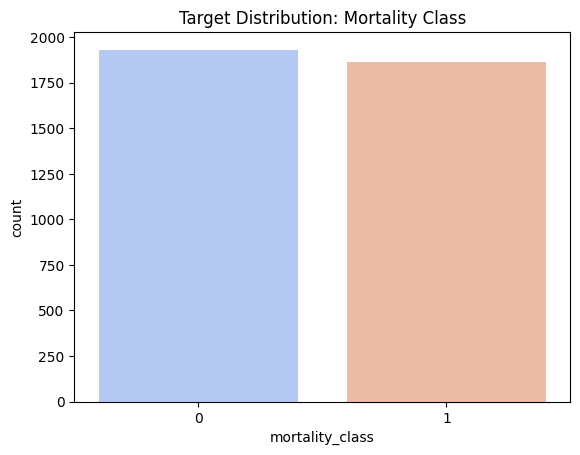

In [74]:
# Check target distribution (if classification target is 'mortality_class')
sns.countplot(x='mortality_class', data=combined_df, palette='coolwarm')
plt.title("Target Distribution: Mortality Class")
plt.show()

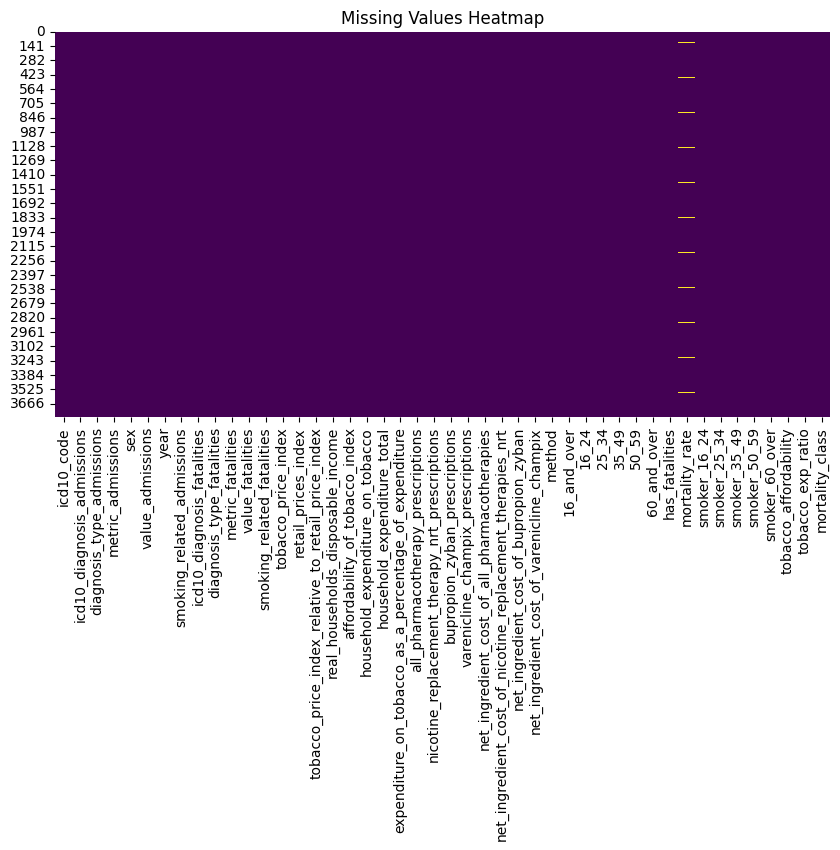

In [75]:
plt.figure(figsize=(10, 5))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


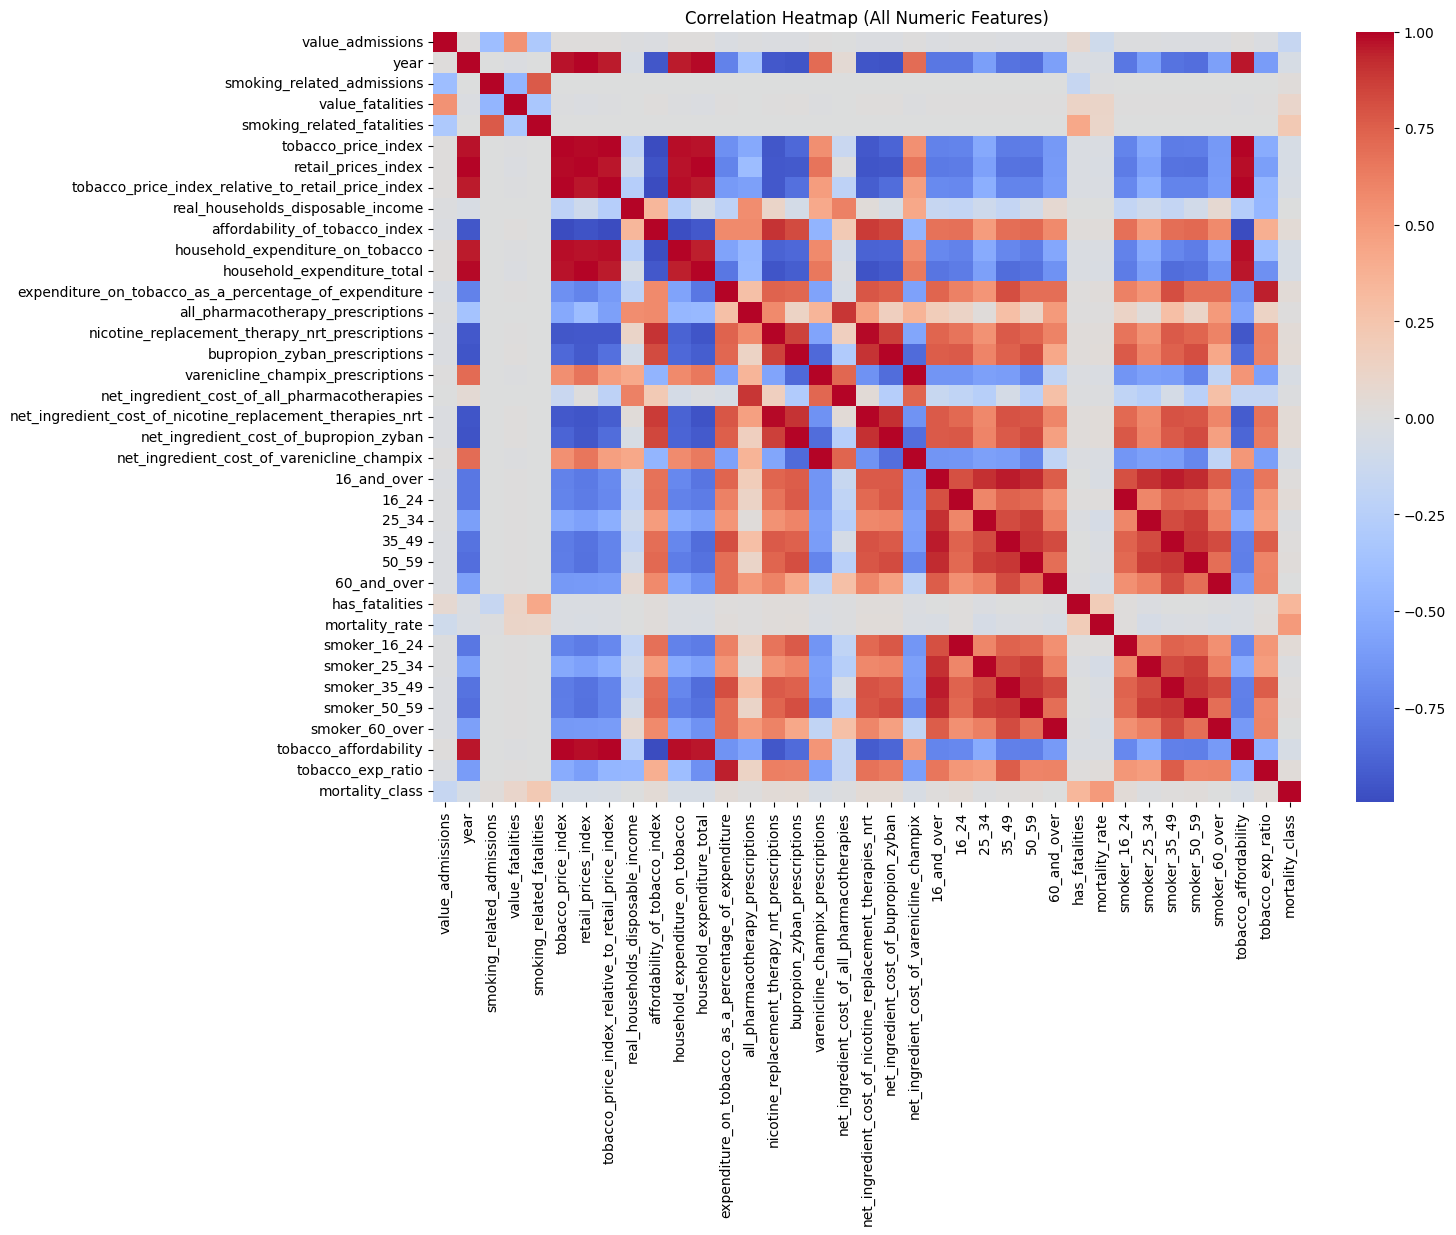

Top correlations with target:
 mortality_class                                              1.000000
mortality_rate                                               0.500359
has_fatalities                                               0.341936
smoking_related_fatalities                                   0.215179
value_fatalities                                             0.101564
net_ingredient_cost_of_bupropion_zyban                       0.048136
bupropion_zyban_prescriptions                                0.047786
net_ingredient_cost_of_nicotine_replacement_therapies_nrt    0.044300
affordability_of_tobacco_index                               0.042527
nicotine_replacement_therapy_nrt_prescriptions               0.041978
expenditure_on_tobacco_as_a_percentage_of_expenditure        0.035230
smoker_16_24                                                 0.034404
16_24                                                        0.034404
tobacco_exp_ratio                                          

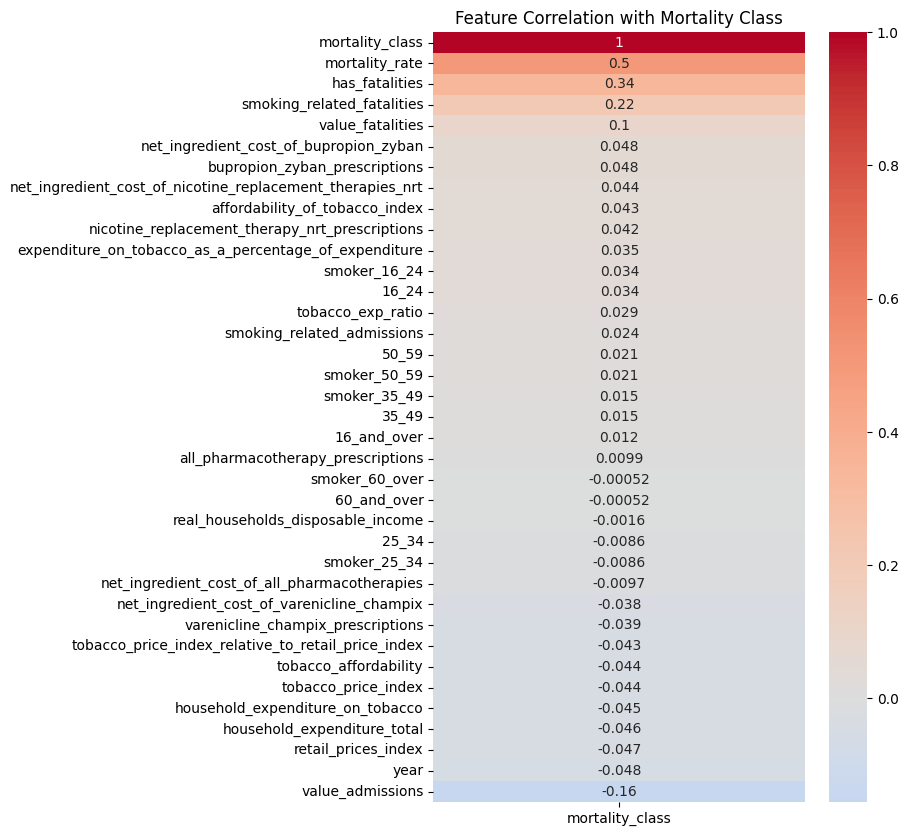

In [76]:
numeric_cols = combined_df.select_dtypes(include=np.number).columns

# Full correlation matrix
corr_matrix = combined_df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (All Numeric Features)")
plt.show()

# Correlation with target
if 'mortality_class' in combined_df.columns:
    corr_with_target = corr_matrix['mortality_class'].sort_values(ascending=False)
    print("Top correlations with target:\n", corr_with_target)

    plt.figure(figsize=(6, 10))
    sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', center=0)
    plt.title("Feature Correlation with Mortality Class")
    plt.show()


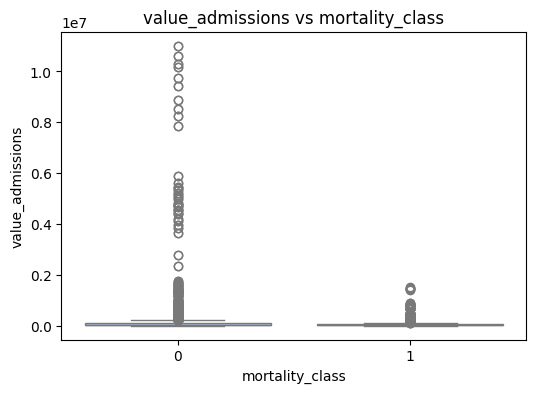

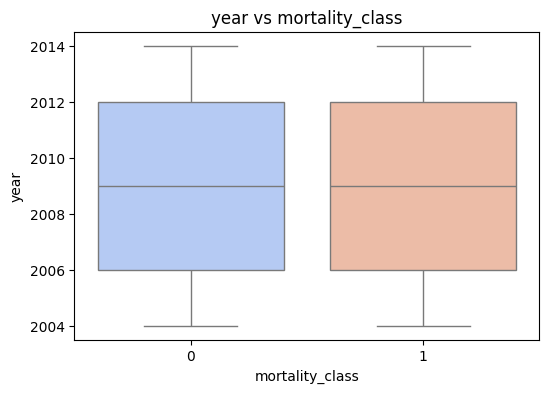

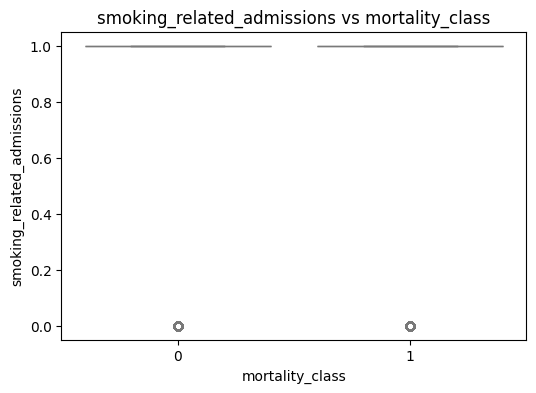

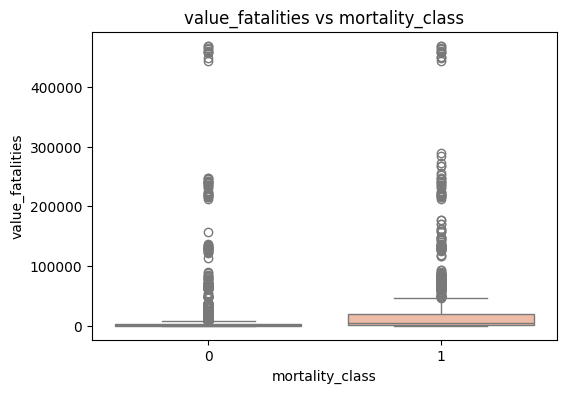

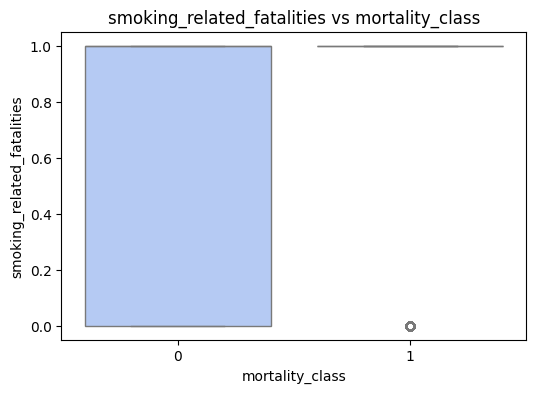

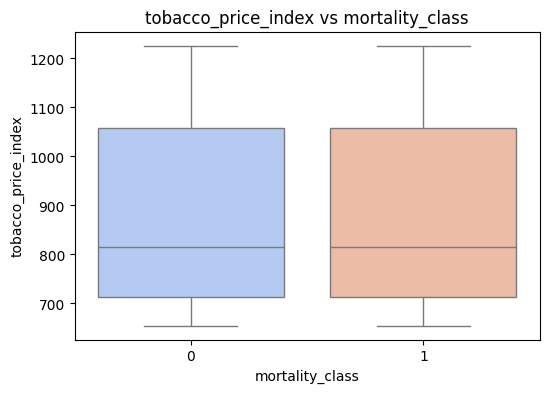

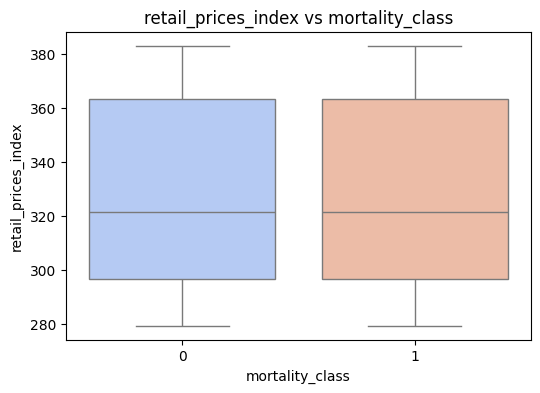

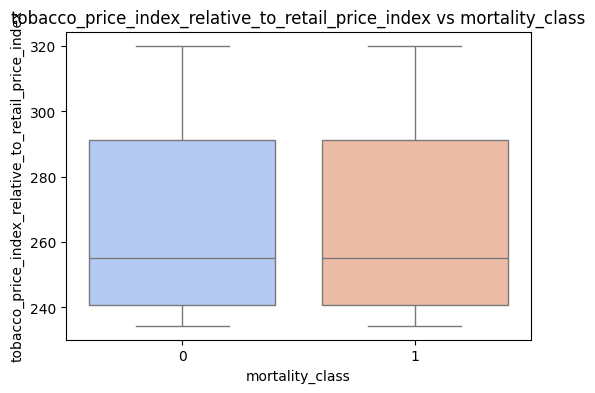

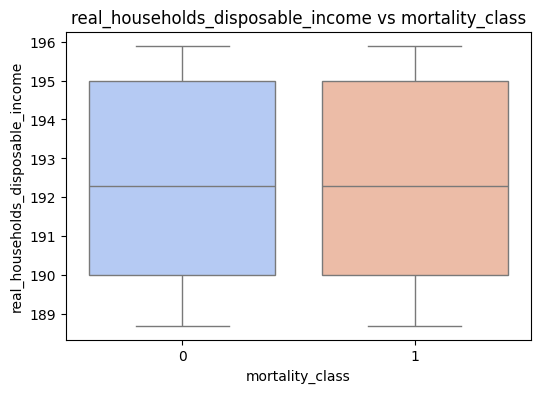

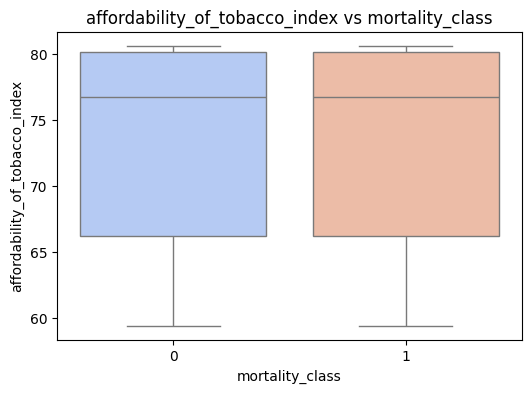

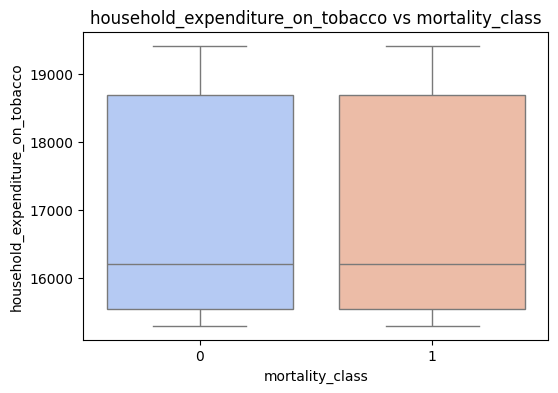

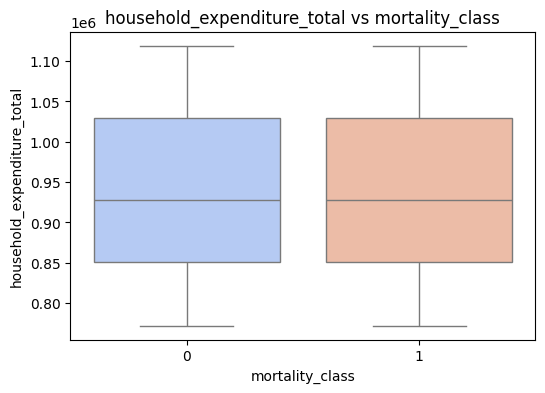

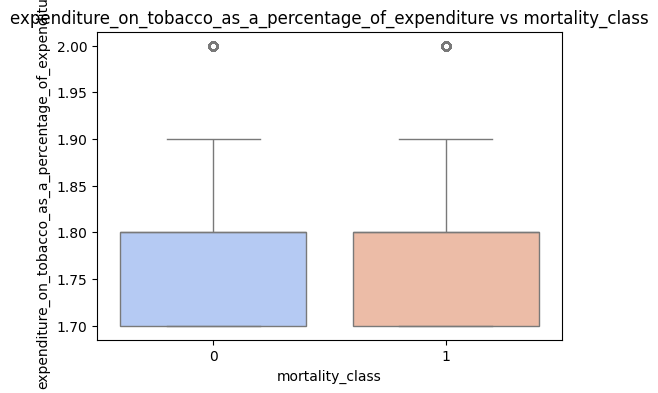

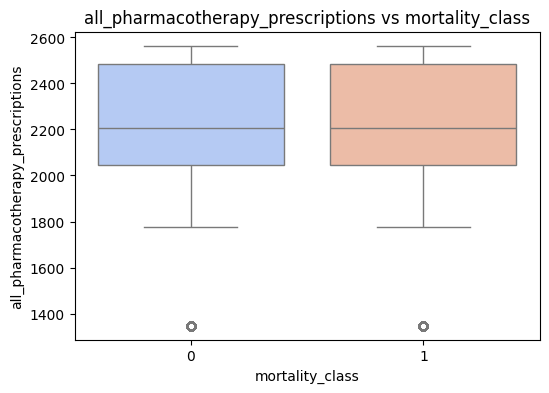

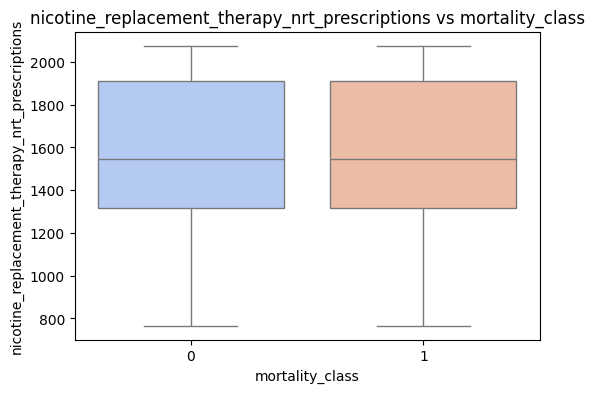

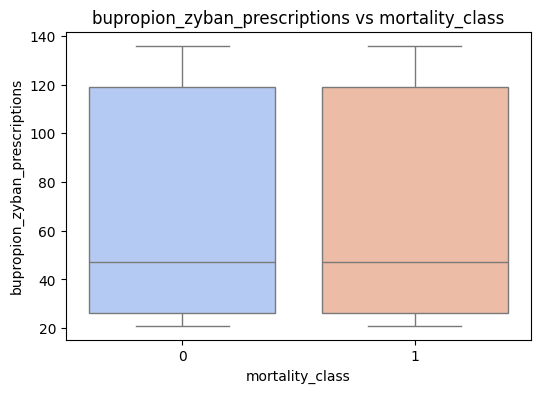

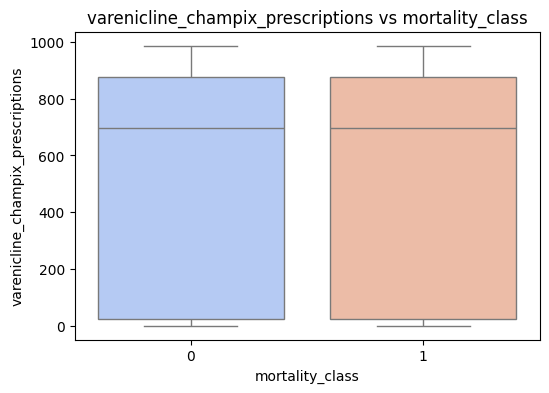

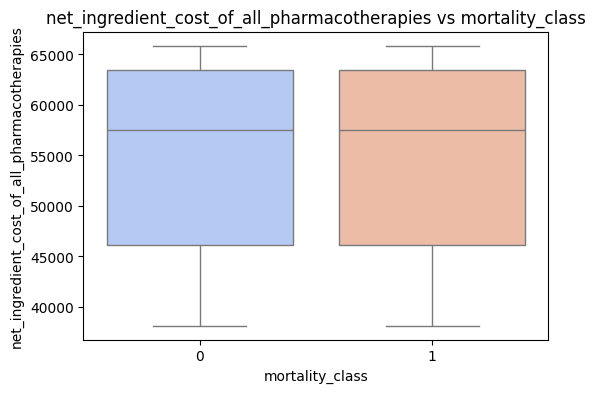

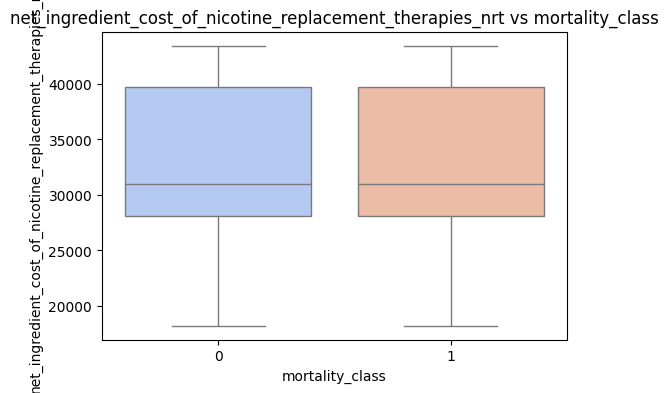

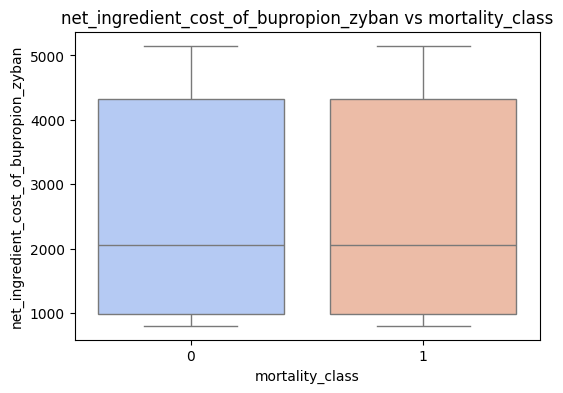

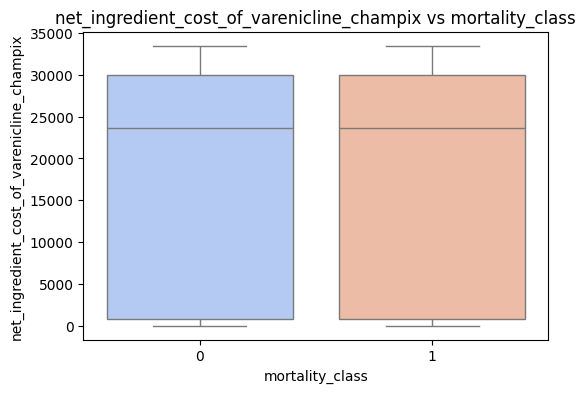

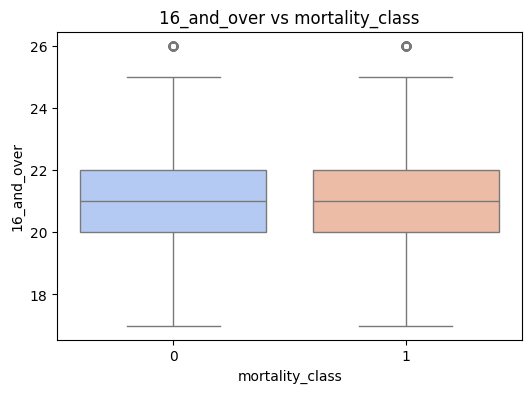

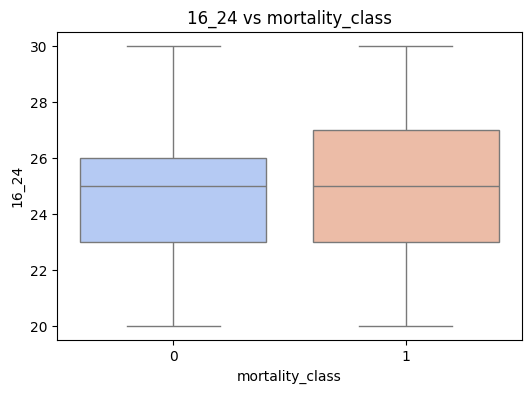

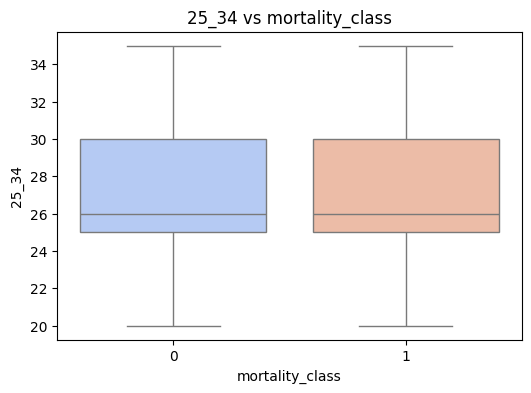

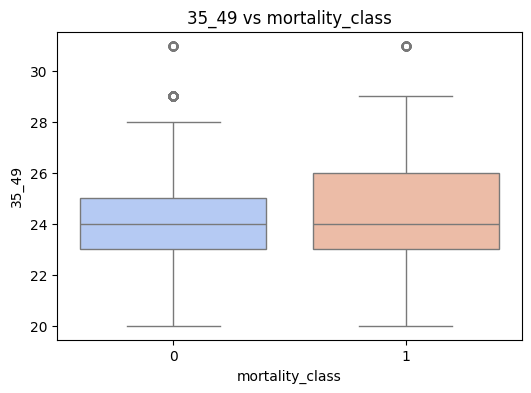

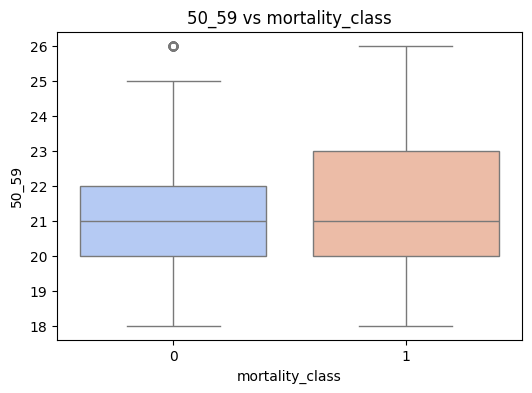

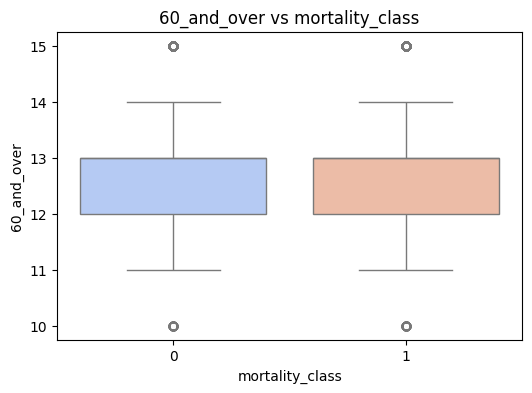

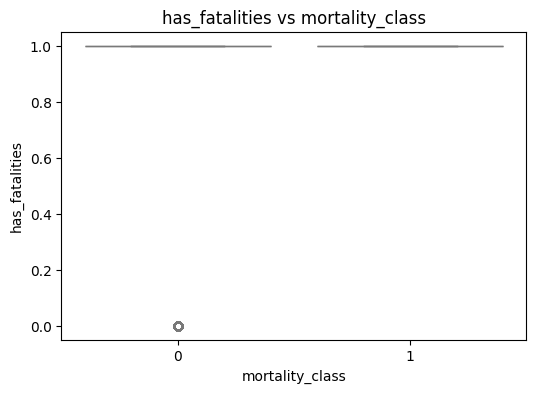

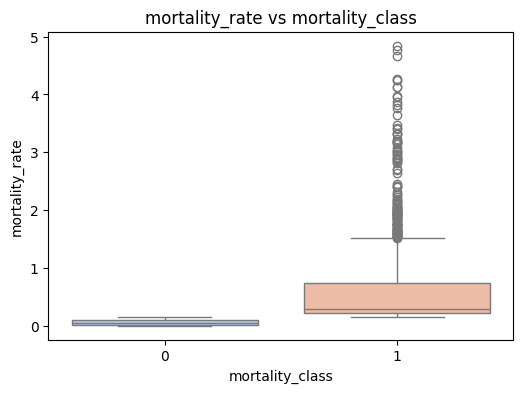

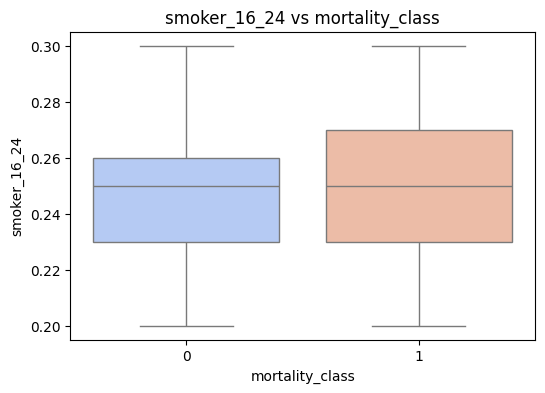

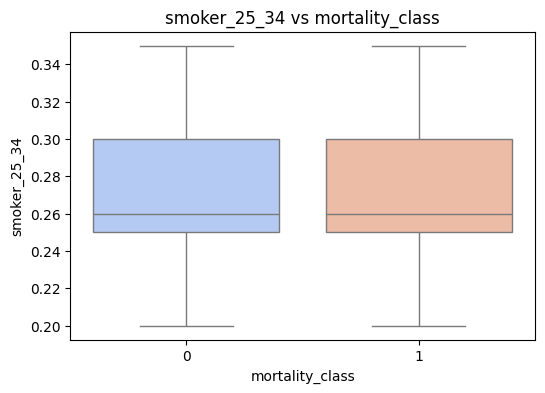

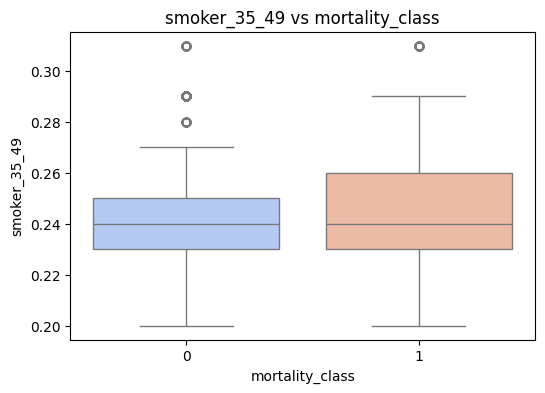

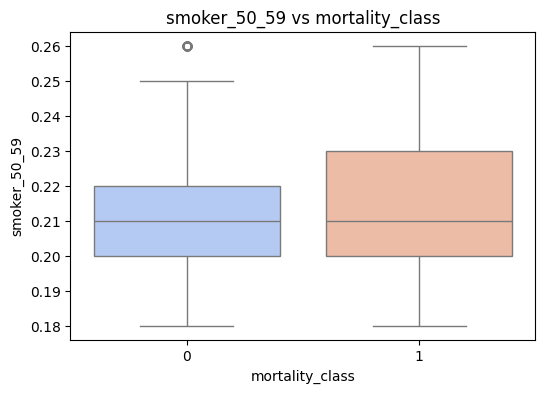

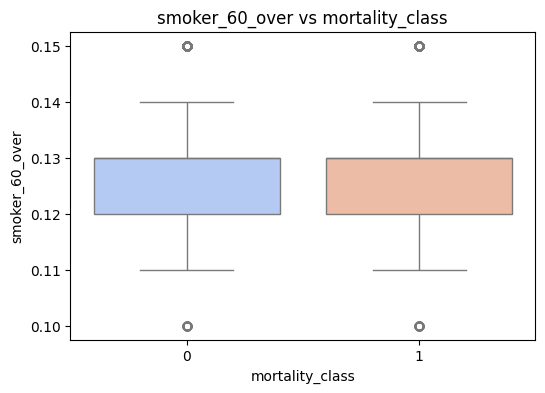

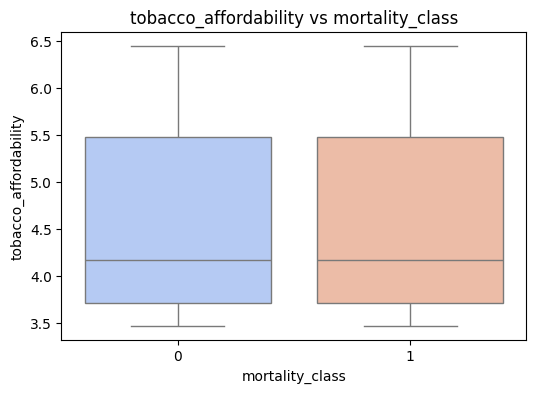

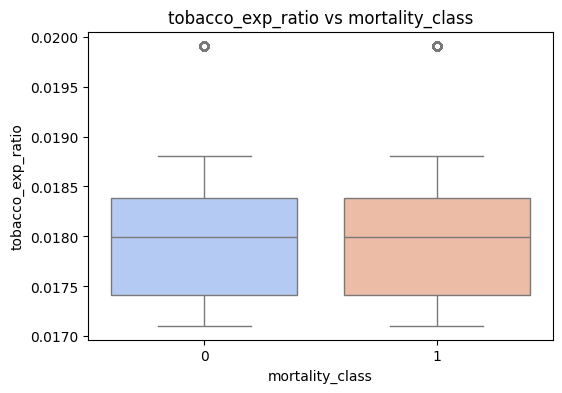

In [83]:
target = 'mortality_class'
num_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = combined_df.select_dtypes(include='object').columns

# Continuous features vs target
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=combined_df, palette='coolwarm')
        plt.title(f"{col} vs {target}")
        plt.show()

In [87]:
cat_cols

Index(['icd10_code', 'icd10_diagnosis_admissions', 'diagnosis_type_admissions',
       'metric_admissions', 'sex', 'icd10_diagnosis_fatalities',
       'diagnosis_type_fatalities', 'metric_fatalities', 'method'],
      dtype='object')

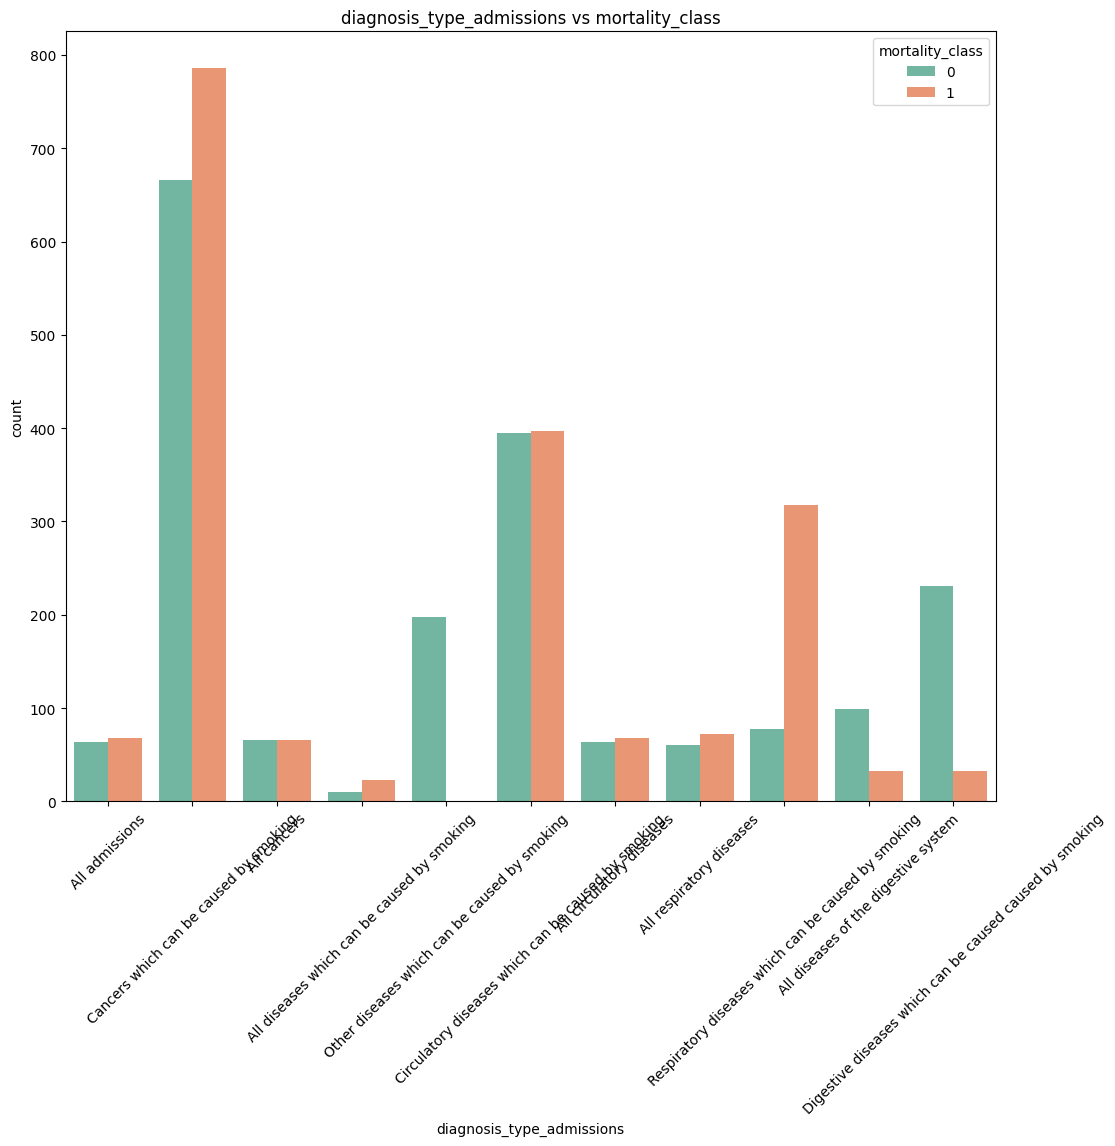

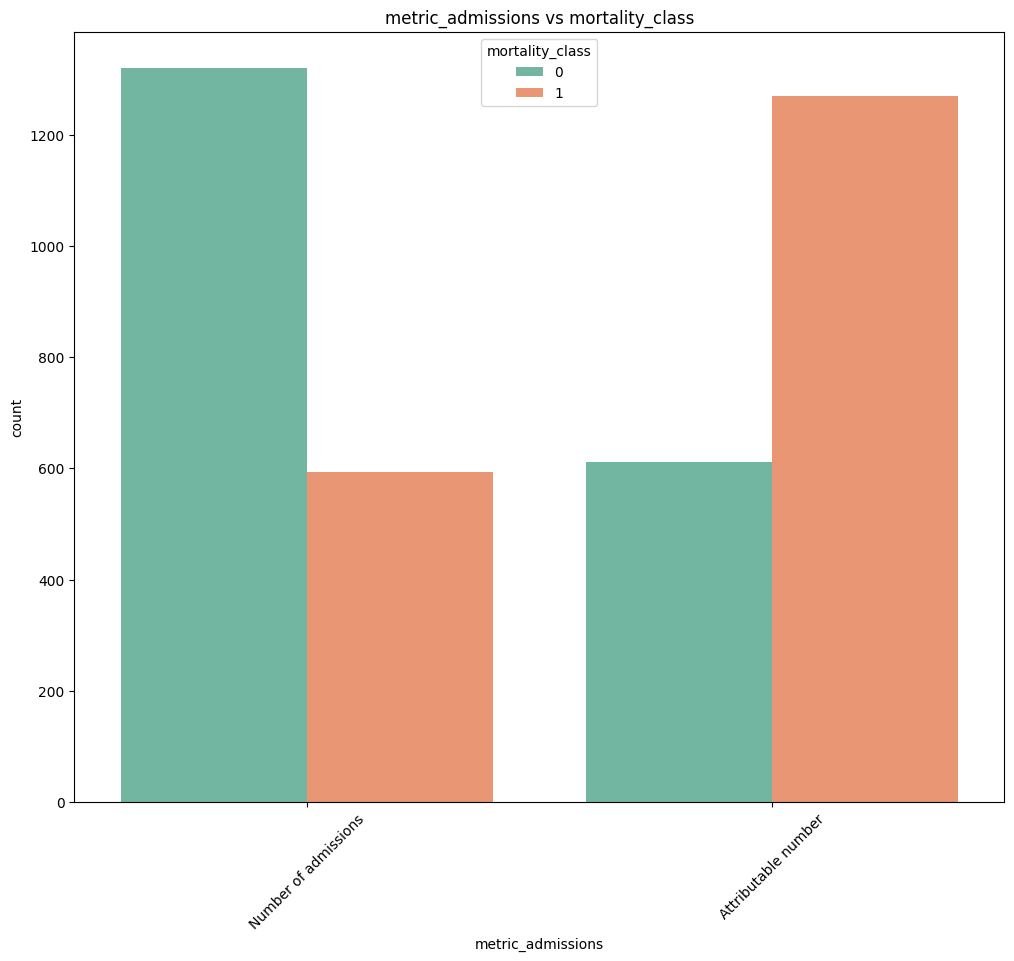

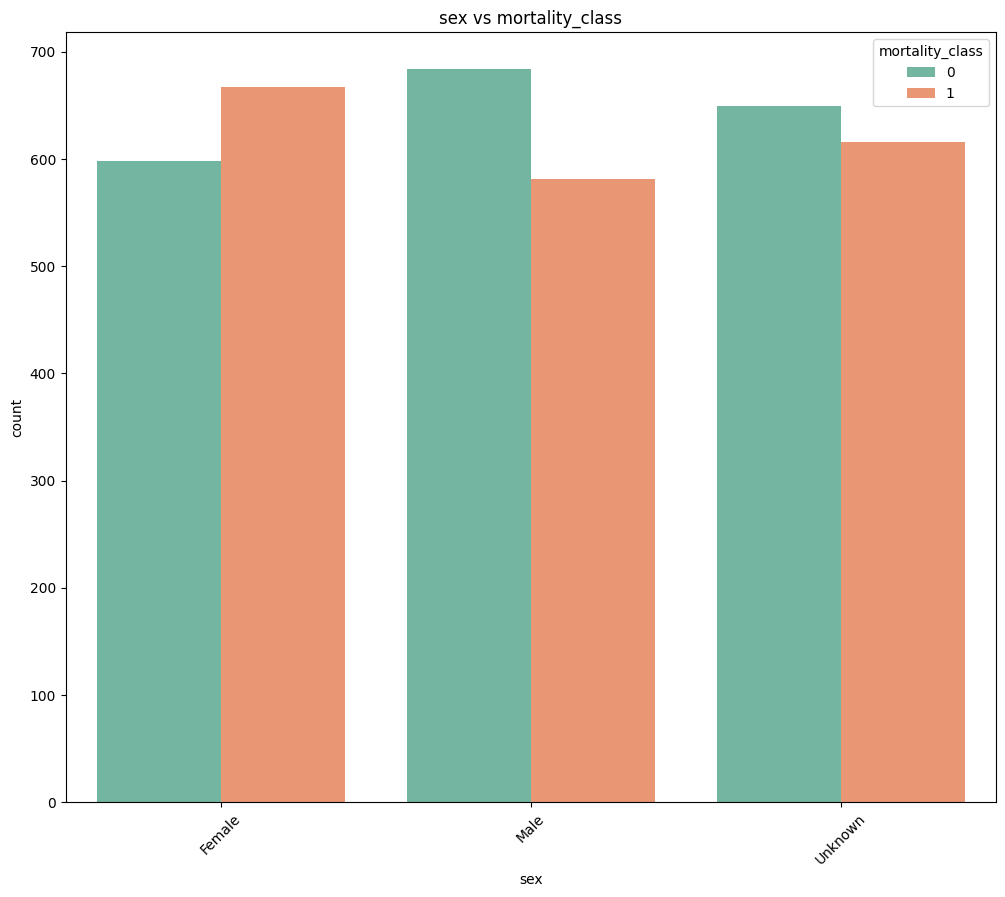

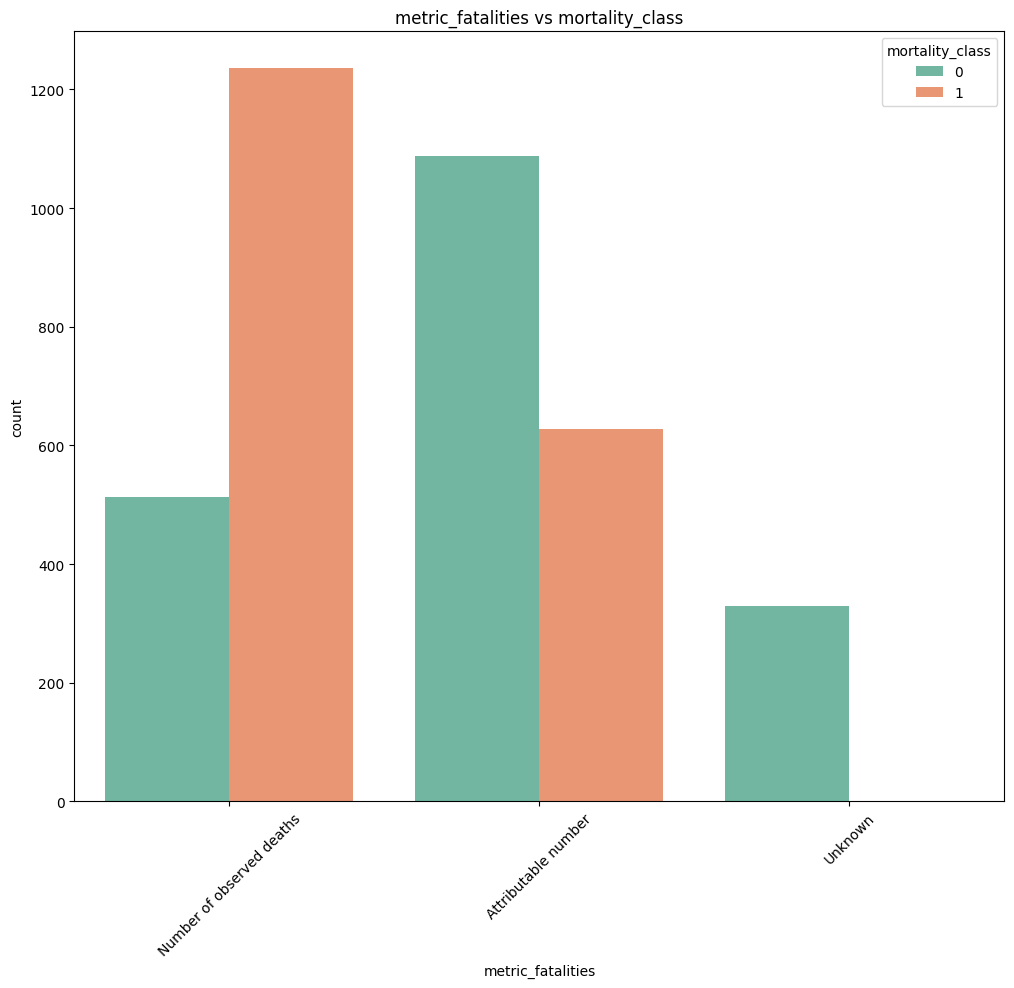

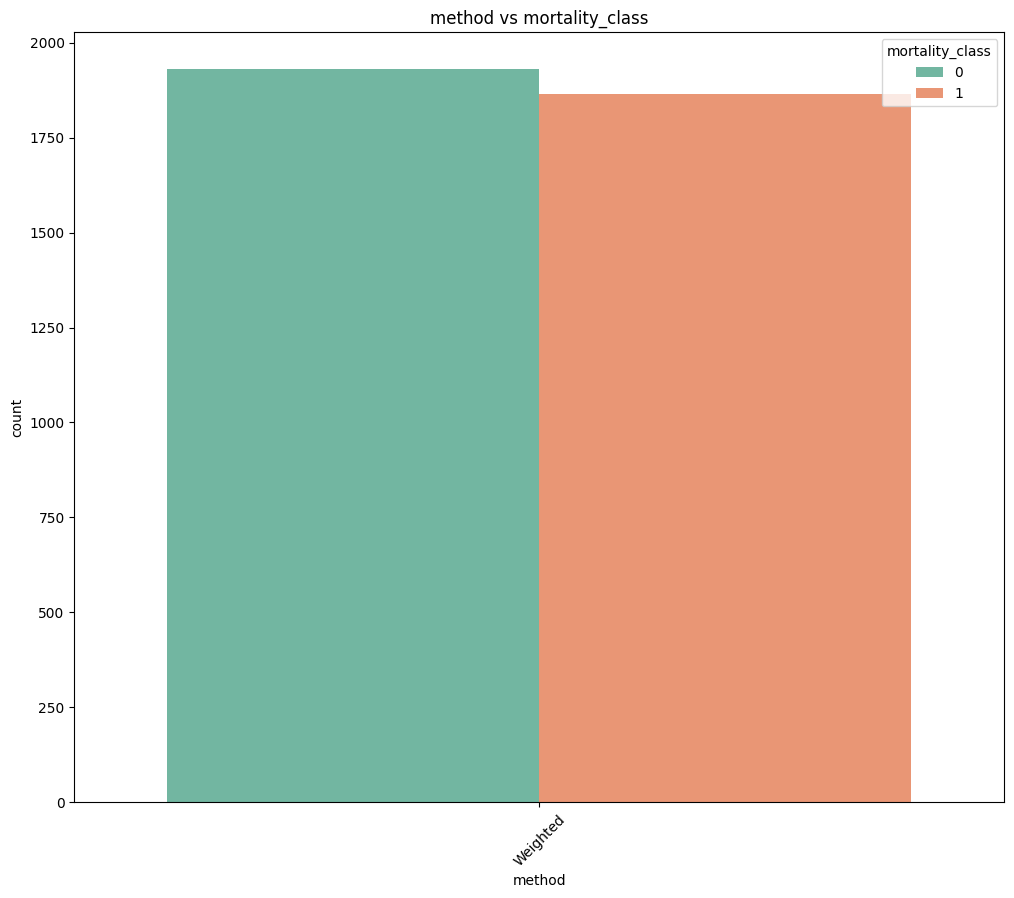

In [89]:
# Categorical features vs target
cats_cols =['diagnosis_type_admissions',
       'metric_admissions', 'sex','metric_fatalities', 'method']
for col in cats_cols:
    plt.figure(figsize=(12, 10))
    sns.countplot(x=col, hue=target, data=combined_df, palette='Set2')
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

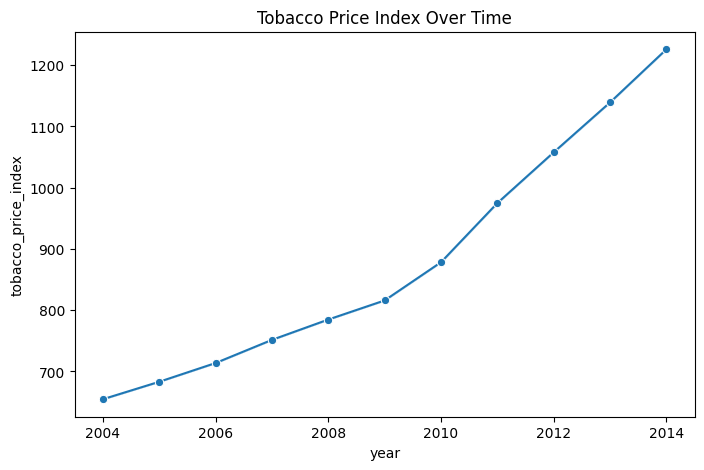

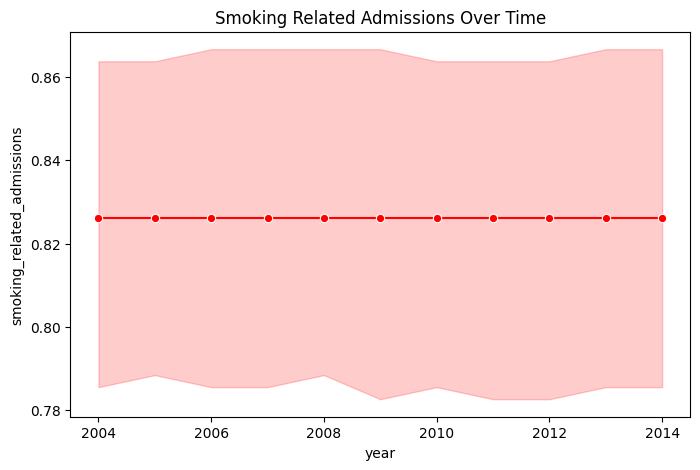

In [79]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='tobacco_price_index', data=combined_df, marker='o')
plt.title("Tobacco Price Index Over Time")
plt.show()

plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='smoking_related_admissions', data=combined_df, marker='o', color='r')
plt.title("Smoking Related Admissions Over Time")
plt.show()


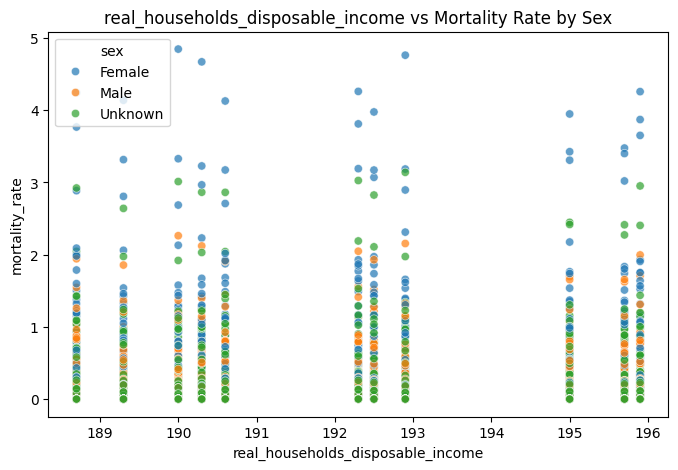

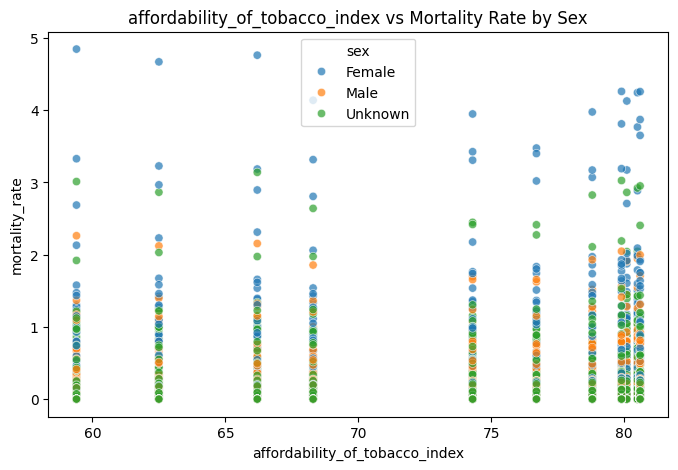

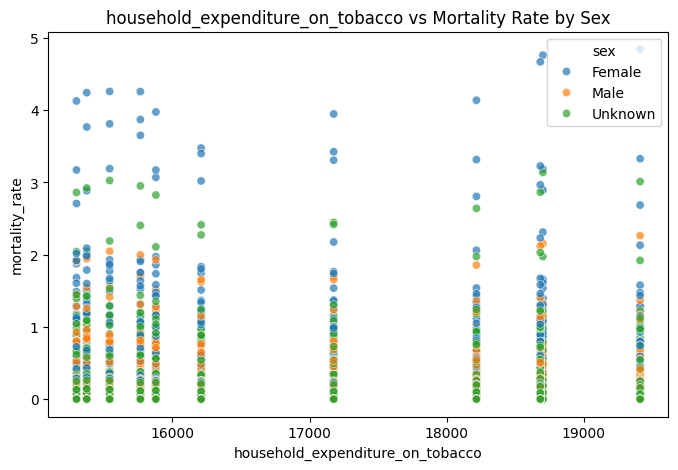

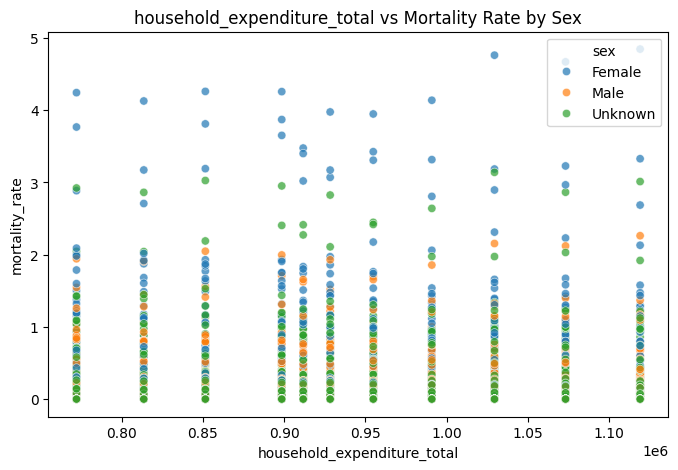

In [80]:
econ_vars = [
    'real_households_disposable_income',
    'affordability_of_tobacco_index',
    'household_expenditure_on_tobacco',
    'household_expenditure_total'
]

for col in econ_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y='mortality_rate', hue='sex', data=combined_df, alpha=0.7)
    plt.title(f"{col} vs Mortality Rate by Sex")
    plt.show()


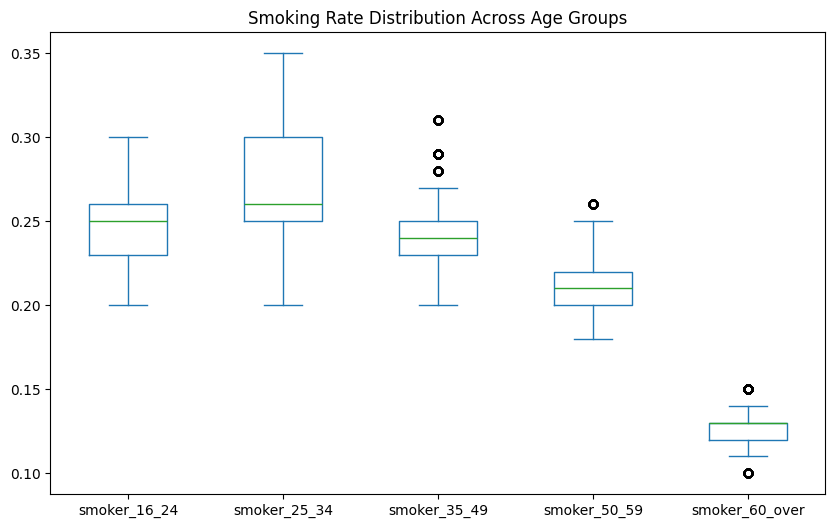

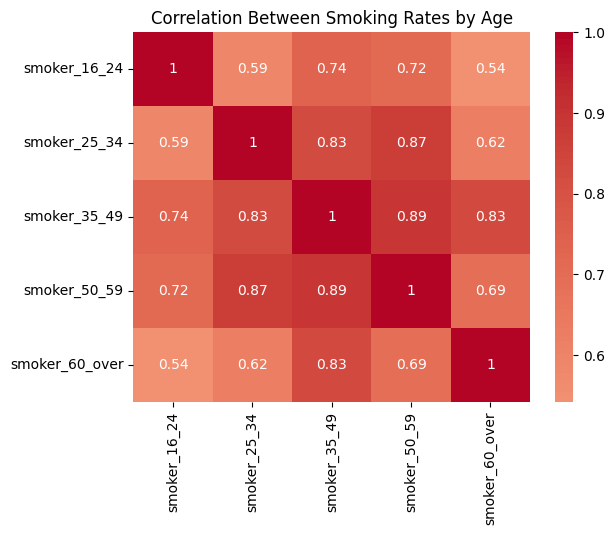

In [81]:
smoking_cols = ['smoker_16_24', 'smoker_25_34', 'smoker_35_49', 'smoker_50_59', 'smoker_60_over']

combined_df[smoking_cols].plot(kind='box', figsize=(10, 6))
plt.title("Smoking Rate Distribution Across Age Groups")
plt.show()

sns.heatmap(combined_df[smoking_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Smoking Rates by Age")
plt.show()


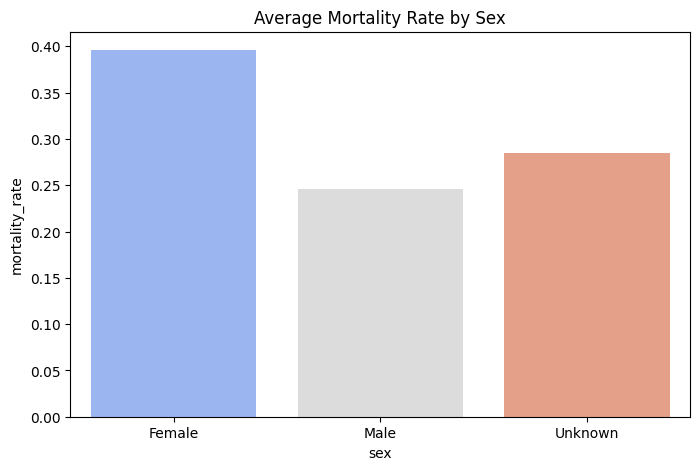

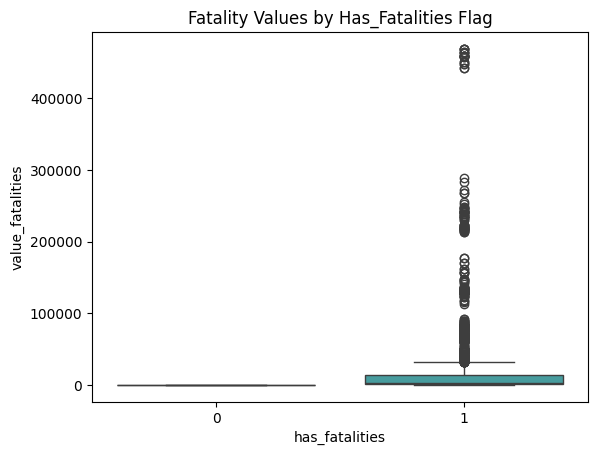

In [82]:
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='mortality_rate', data=combined_df, estimator=np.mean, ci=None, palette='coolwarm')
plt.title("Average Mortality Rate by Sex")
plt.show()

sns.boxplot(x='has_fatalities', y='value_fatalities', data=combined_df, palette='mako')
plt.title("Fatality Values by Has_Fatalities Flag")
plt.show()


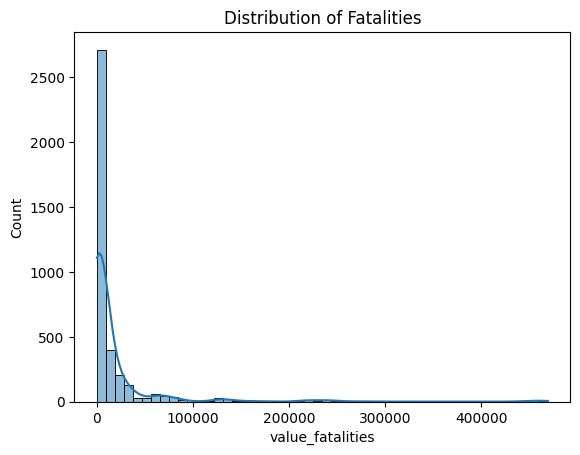

In [57]:
sns.histplot(combined_df['value_fatalities'], bins=50, kde=True)
plt.title('Distribution of Fatalities')
plt.show()

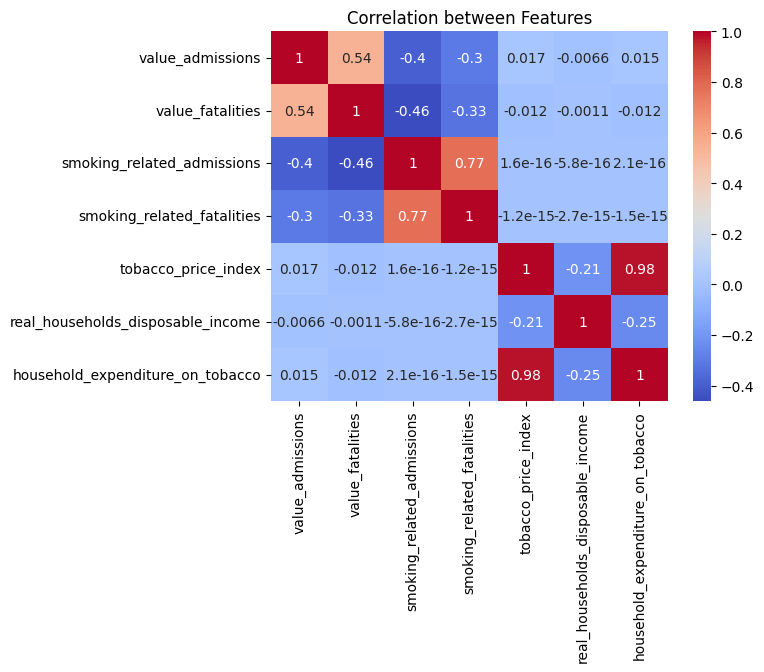

In [58]:
# Select numeric columns
numeric_cols = ['value_admissions', 'value_fatalities', 'smoking_related_admissions',
                'smoking_related_fatalities', 'tobacco_price_index',
                'real_households_disposable_income', 'household_expenditure_on_tobacco']

sns.heatmap(combined_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


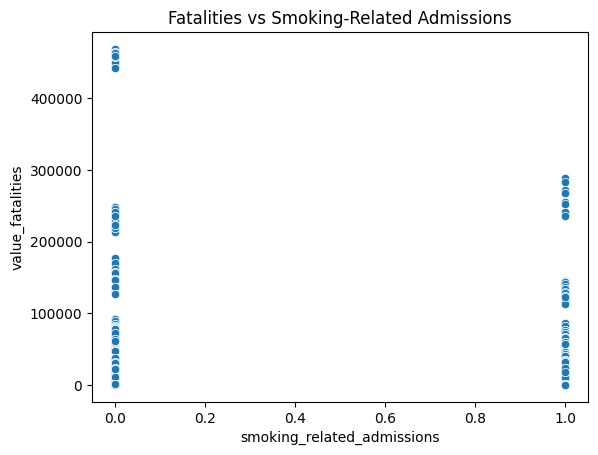

In [59]:
sns.scatterplot(data=combined_df, x='smoking_related_admissions', y='value_fatalities')
plt.title('Fatalities vs Smoking-Related Admissions')
plt.show()


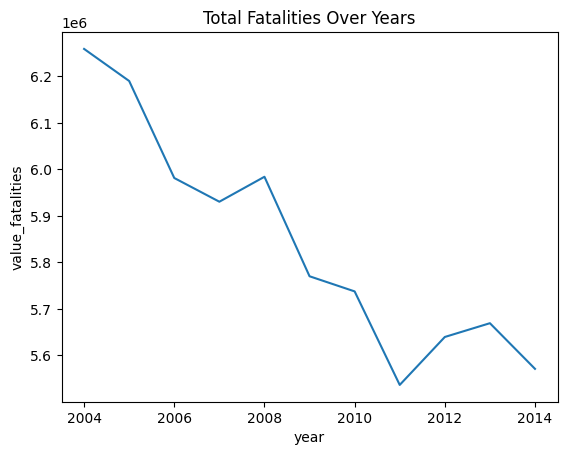

In [60]:
sns.lineplot(data=combined_df.groupby('year')['value_fatalities'].sum().reset_index(), x='year', y='value_fatalities')
plt.title('Total Fatalities Over Years')
plt.show()


In [61]:
combined_df.columns

Index(['icd10_code', 'icd10_diagnosis_admissions', 'diagnosis_type_admissions',
       'metric_admissions', 'sex', 'value_admissions', 'year',
       'smoking_related_admissions', 'icd10_diagnosis_fatalities',
       'diagnosis_type_fatalities', 'metric_fatalities', 'value_fatalities',
       'smoking_related_fatalities', 'tobacco_price_index',
       'retail_prices_index',
       'tobacco_price_index_relative_to_retail_price_index',
       'real_households_disposable_income', 'affordability_of_tobacco_index',
       'household_expenditure_on_tobacco', 'household_expenditure_total',
       'expenditure_on_tobacco_as_a_percentage_of_expenditure',
       'all_pharmacotherapy_prescriptions',
       'nicotine_replacement_therapy_nrt_prescriptions',
       'bupropion_zyban_prescriptions', 'varenicline_champix_prescriptions',
       'net_ingredient_cost_of_all_pharmacotherapies',
       'net_ingredient_cost_of_nicotine_replacement_therapies_nrt',
       'net_ingredient_cost_of_bupropion_zyba

In [62]:
combined_df.shape

(3795, 45)

# **Model Building and Evaluation**

In [63]:
# Define binary target: 1 if mortality_rate above median, else 0
threshold = combined_df['mortality_rate'].median()
combined_df['mortality_class'] = (combined_df['mortality_rate'] > threshold).astype(int)

y = combined_df['mortality_class']

# Feature columns (drop target and identifiers)
drop_cols = [
    'mortality_rate', 'mortality_class',
    'icd10_diagnosis_admissions', 'diagnosis_type_admissions',
    'metric_admissions', 'icd10_diagnosis_fatalities', 'diagnosis_type_fatalities',
    'metric_fatalities', 'icd10_code'
]

X = combined_df[[col for col in combined_df.columns if col not in drop_cols]].copy()
categorical_cols = ['sex', 'method']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

In [64]:
# Drop leakage columns
leak_cols = ['value_fatalities', 'smoking_related_fatalities', 'mortality_rate','mortality_class']
X = combined_df.drop(columns=leak_cols + ['has_fatalities'])  # drop target-related
y = (combined_df['mortality_rate'] > 0).astype(int)  # binary target: 1 if mortality > 0 else 0

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# --- 2. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Scale features for SVM / Neural Network ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Define models ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
}

# --- 5. Train & evaluate ---
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Use scaled features for SVM and Neural Network
    if name in ['SVM', 'Neural Network']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

    # Metrics
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        82
           1       0.97      1.00      0.98       677

    accuracy                           0.97       759
   macro avg       0.98      0.86      0.91       759
weighted avg       0.97      0.97      0.97       759

Confusion Matrix:
 [[ 59  23]
 [  0 677]]
ROC-AUC Score: 0.9190654609648017

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      1.00      1.00       677

    accuracy                           1.00       759
   macro avg       0.99      1.00      1.00       759
weighted avg       1.00      1.00      1.00       759

Confusion Matrix:
 [[ 82   0]
 [  1 676]]
ROC-AUC Score: 0.999261447562777

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           

In [65]:
X.columns

Index(['icd10_code', 'icd10_diagnosis_admissions', 'diagnosis_type_admissions',
       'metric_admissions', 'sex', 'value_admissions', 'year',
       'smoking_related_admissions', 'icd10_diagnosis_fatalities',
       'diagnosis_type_fatalities', 'metric_fatalities', 'tobacco_price_index',
       'retail_prices_index',
       'tobacco_price_index_relative_to_retail_price_index',
       'real_households_disposable_income', 'affordability_of_tobacco_index',
       'household_expenditure_on_tobacco', 'household_expenditure_total',
       'expenditure_on_tobacco_as_a_percentage_of_expenditure',
       'all_pharmacotherapy_prescriptions',
       'nicotine_replacement_therapy_nrt_prescriptions',
       'bupropion_zyban_prescriptions', 'varenicline_champix_prescriptions',
       'net_ingredient_cost_of_all_pharmacotherapies',
       'net_ingredient_cost_of_nicotine_replacement_therapies_nrt',
       'net_ingredient_cost_of_bupropion_zyban',
       'net_ingredient_cost_of_varenicline_champix', 

# **Correlation Analysis**

In [66]:
# Select numeric features
numeric_cols = X.select_dtypes(include=np.number).columns

# Compute correlation with target
corr_with_y = X[numeric_cols].corrwith(y)
corr_with_y = corr_with_y.sort_values(ascending=False)

print("Top features correlated with target:")
print(corr_with_y)


Top features correlated with target:
value_admissions                                             0.072142
icd10_diagnosis_admissions                                   0.043443
net_ingredient_cost_of_bupropion_zyban                       0.021822
bupropion_zyban_prescriptions                                0.021799
affordability_of_tobacco_index                               0.020403
net_ingredient_cost_of_nicotine_replacement_therapies_nrt    0.020175
nicotine_replacement_therapy_nrt_prescriptions               0.019415
expenditure_on_tobacco_as_a_percentage_of_expenditure        0.013935
16_24                                                        0.011843
smoker_16_24                                                 0.011843
tobacco_exp_ratio                                            0.011256
sex                                                          0.008317
all_pharmacotherapy_prescriptions                            0.003964
metric_admissions                                    

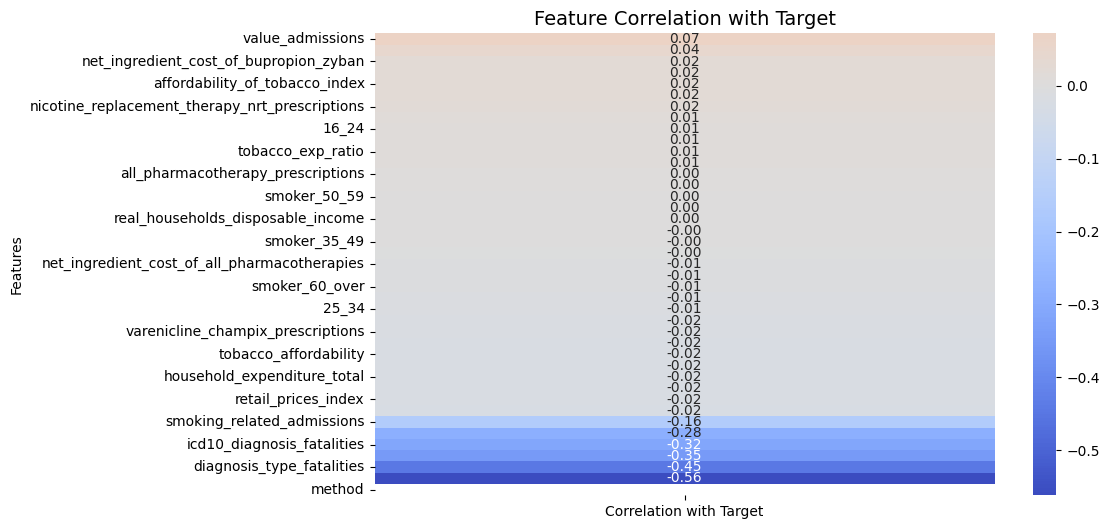

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_with_y.to_frame(name='Correlation with Target'),
    annot=True, cmap='coolwarm', center=0, fmt=".2f"
)
plt.title('Feature Correlation with Target', fontsize=14)
plt.ylabel('Features')
plt.show()

In [68]:
# Define the potential leakage columns
leakage_cols = ['value_fatalities', 'has_fatalities', 'mortality_rate','mortality_class']

# Check which of these columns actually exist in X
existing_leakage_cols = [col for col in leakage_cols if col in X.columns]
print("Columns found in X:", existing_leakage_cols)

# If any exist, check correlation with target
if existing_leakage_cols:
    print(X[existing_leakage_cols].corrwith(y))
else:
    print("No leakage columns found in X.")


Columns found in X: []
No leakage columns found in X.


# **Top Features**

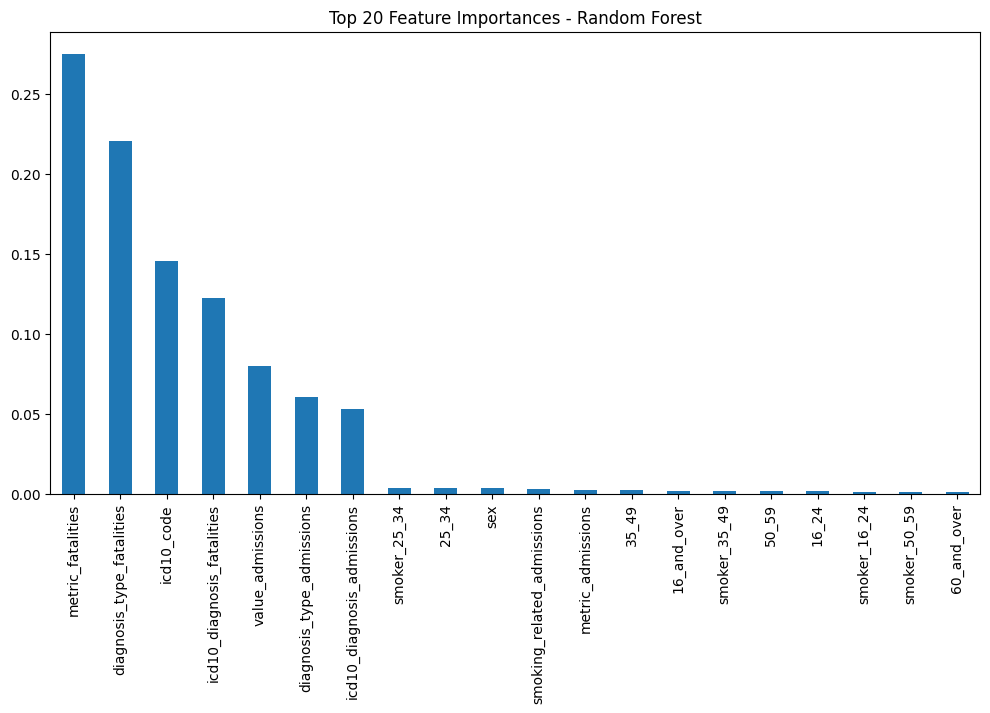

In [69]:
# Assume X_train, X_test, y_train, y_test are already defined
# Train a Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# -----------------------
# 1. Feature Importance
# -----------------------
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances[:20].plot(kind='bar')  # top 20 features
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()

# **Model Explainability**

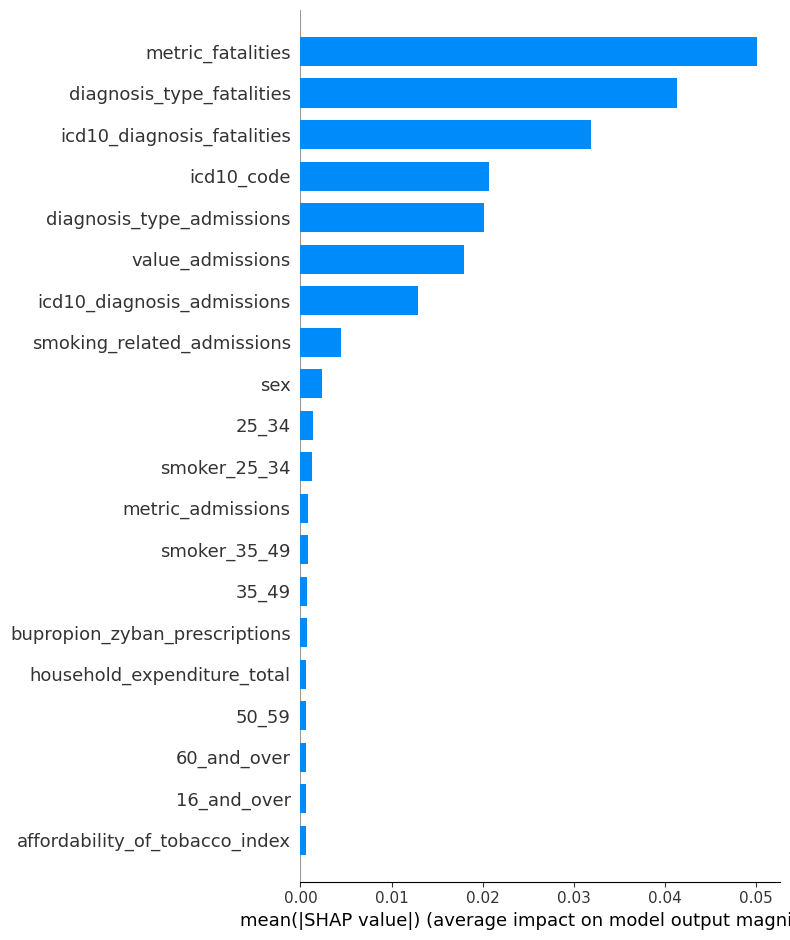

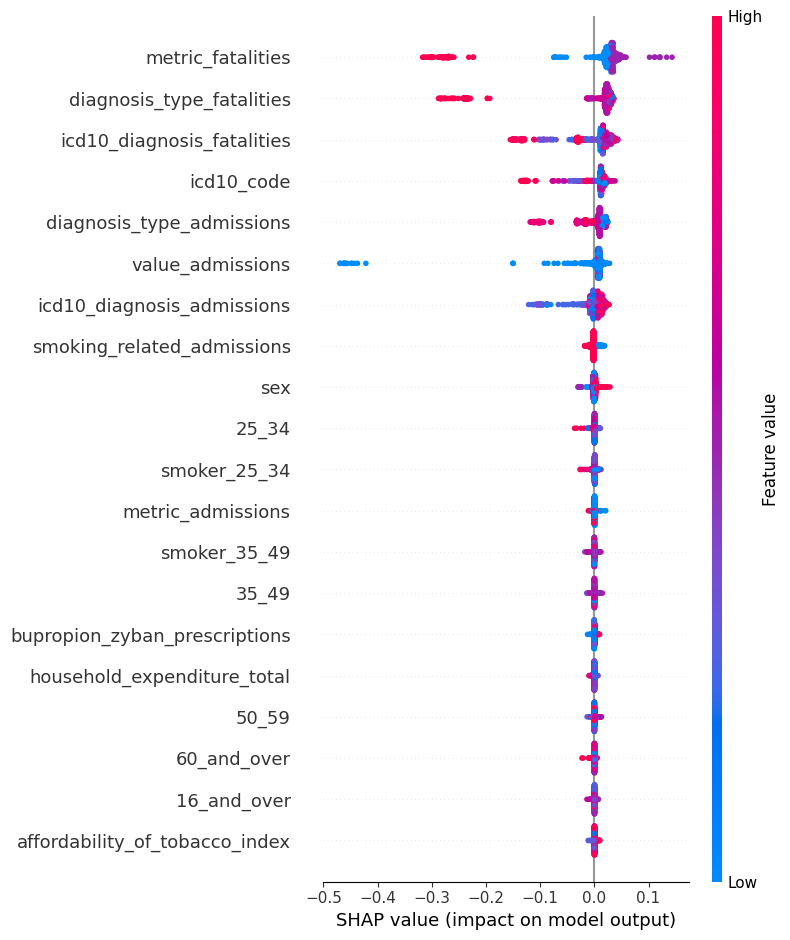

In [90]:
# Make sure X_test is a DataFrame
X_test = X_test.copy()

# Step 1: Create SHAP explainer
explainer = shap.TreeExplainer(rf)  # rf = trained RandomForest
shap_values = explainer(X_test)  # Note: use explainer(X) instead of explainer.shap_values()

# Step 2: Global feature importance (summary plot)
# shap_values.values has shape (n_samples, n_features, n_classes)
# For binary classification, shap_values.values[:,:,1] corresponds to class 1
shap.summary_plot(shap_values.values[:,:,1], X_test, plot_type="bar")   # bar plot
shap.summary_plot(shap_values.values[:,:,1], X_test)                     # beeswarm plot

# Step 3: Local explanation (force plot for first sample)
shap.initjs()
shap.force_plot(
    shap_values.base_values[0,1],   # expected value for class 1
    shap_values.values[0,:,1],      # SHAP values for first sample
    X_test.iloc[0,:]                # feature values
)


In [91]:
# -----------------------
# 3. LIME explanations
# -----------------------
explainer_lime = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Mortality','Mortality'],
    mode='classification'
)

# Explain a single instance
i = 0  # first test instance
exp = explainer_lime.explain_instance(
    X_test.iloc[i].values,
    rf.predict_proba,
    num_features=10
)
exp.show_in_notebook(show_table=True)

In [92]:
import pickle

# Train model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Dump model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Dump preprocessor
preprocessor = {
    'label_encoders': le_dict,
    'scaler': scaler
}
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)
